In [1]:
import pandas as pd
import numpy as np
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.core.converters import Loader, Saver
jvm.start()
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\DHRUV\\anaconda3\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [2]:
df_train = pd.read_csv('aps_train.csv',index_col=0)
print(df_train)

       class  aa_000    ab_000        ac_000      ad_000  ae_000  af_000  \
0          0   76698  0.000000  2.130706e+09  280.000000     0.0     0.0   
1          0   33058  0.645959  0.000000e+00  638.509566     0.0     0.0   
2          0   41040  0.644207  2.280000e+02  100.000000     0.0     0.0   
3          0      12  0.000000  7.000000e+01   66.000000     0.0    10.0   
4          0   60874  0.035666  1.368000e+03  458.000000     0.0     0.0   
...      ...     ...       ...           ...         ...     ...     ...   
59995      0  153002  0.355823  6.640000e+02  186.000000     0.0     0.0   
59996      0    2286  0.000000  2.130707e+09  224.000000     0.0     0.0   
59997      0     112  0.000000  2.130706e+09   18.000000     0.0     0.0   
59998      0   80292  0.117141  2.130706e+09  494.000000     0.0     0.0   
59999      0   40222  0.001512  6.980000e+02  628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0     

In [3]:
for i in np.arange(0,60000):
    if df_train.iloc[i,0]==0:
        df_train.iloc[i,0] = 'neg'
    else:
        df_train.iloc[i,0] = 'pos'

print(df_train)

      class  aa_000    ab_000        ac_000      ad_000  ae_000  af_000  \
0       neg   76698  0.000000  2.130706e+09  280.000000     0.0     0.0   
1       neg   33058  0.645959  0.000000e+00  638.509566     0.0     0.0   
2       neg   41040  0.644207  2.280000e+02  100.000000     0.0     0.0   
3       neg      12  0.000000  7.000000e+01   66.000000     0.0    10.0   
4       neg   60874  0.035666  1.368000e+03  458.000000     0.0     0.0   
...     ...     ...       ...           ...         ...     ...     ...   
59995   neg  153002  0.355823  6.640000e+02  186.000000     0.0     0.0   
59996   neg    2286  0.000000  2.130707e+09  224.000000     0.0     0.0   
59997   neg     112  0.000000  2.130706e+09   18.000000     0.0     0.0   
59998   neg   80292  0.117141  2.130706e+09  494.000000     0.0     0.0   
59999   neg   40222  0.001512  6.980000e+02  628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     

In [4]:
df_train.to_csv('aps_train_for_weka.csv') # We'll edit this for weka so that indices are removed

In [5]:
loader = Loader(classname="weka.core.converters.CSVLoader")

In [6]:
data = loader.load_file("aps_train_for_weka_index_normal.csv")
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
data.class_is_first()
cls = Classifier(classname="weka.classifiers.trees.LMT")
cls.build_classifier(data)
for index, inst in enumerate(data):
    pred = cls.classify_instance(inst)
    dist = cls.distribution_for_instance(inst)
    print(str(index+1) + ": label index=" + str(pred) + ", class distribution=" + str(dist))

1: label index=0.0, class distribution=[0.99046293 0.00953707]
2: label index=0.0, class distribution=[0.99843719 0.00156281]
3: label index=0.0, class distribution=[0.998931 0.001069]
4: label index=0.0, class distribution=[9.99314393e-01 6.85607182e-04]
5: label index=0.0, class distribution=[0.9981401 0.0018599]
6: label index=0.0, class distribution=[9.99345666e-01 6.54333707e-04]
7: label index=0.0, class distribution=[9.99404236e-01 5.95764244e-04]
8: label index=0.0, class distribution=[9.99969558e-01 3.04423865e-05]
9: label index=0.0, class distribution=[9.99166730e-01 8.33270464e-04]
10: label index=0.0, class distribution=[0.9909732 0.0090268]
11: label index=0.0, class distribution=[0.99899191 0.00100809]
12: label index=0.0, class distribution=[9.99488825e-01 5.11175421e-04]
13: label index=0.0, class distribution=[9.99278968e-01 7.21031943e-04]
14: label index=0.0, class distribution=[9.99999594e-01 4.06334113e-07]
15: label index=0.0, class distribution=[9.99727419e-01 2

443: label index=0.0, class distribution=[0.99886565 0.00113435]
444: label index=0.0, class distribution=[0.9983186 0.0016814]
445: label index=0.0, class distribution=[0.9984905 0.0015095]
446: label index=0.0, class distribution=[9.99689881e-01 3.10118761e-04]
447: label index=0.0, class distribution=[0.99864235 0.00135765]
448: label index=0.0, class distribution=[9.99534182e-01 4.65818422e-04]
449: label index=0.0, class distribution=[0.99364982 0.00635018]
450: label index=0.0, class distribution=[9.99585090e-01 4.14909784e-04]
451: label index=0.0, class distribution=[9.99372930e-01 6.27070092e-04]
452: label index=0.0, class distribution=[0.99758987 0.00241013]
453: label index=0.0, class distribution=[9.99709797e-01 2.90202506e-04]
454: label index=0.0, class distribution=[9.99056926e-01 9.43074174e-04]
455: label index=0.0, class distribution=[9.99334351e-01 6.65649218e-04]
456: label index=0.0, class distribution=[0.99643465 0.00356535]
457: label index=0.0, class distributi

854: label index=0.0, class distribution=[9.99685072e-01 3.14928462e-04]
855: label index=0.0, class distribution=[9.99744810e-01 2.55189614e-04]
856: label index=0.0, class distribution=[9.99325235e-01 6.74764881e-04]
857: label index=0.0, class distribution=[0.88754168 0.11245832]
858: label index=0.0, class distribution=[9.99586234e-01 4.13766154e-04]
859: label index=0.0, class distribution=[9.99385413e-01 6.14587364e-04]
860: label index=0.0, class distribution=[9.99477681e-01 5.22319112e-04]
861: label index=0.0, class distribution=[0.99858545 0.00141455]
862: label index=0.0, class distribution=[9.99930551e-01 6.94487495e-05]
863: label index=0.0, class distribution=[9.99442601e-01 5.57398618e-04]
864: label index=0.0, class distribution=[9.99807568e-01 1.92431633e-04]
865: label index=0.0, class distribution=[9.99096446e-01 9.03554243e-04]
866: label index=0.0, class distribution=[9.99321838e-01 6.78161729e-04]
867: label index=0.0, class distribution=[9.99294105e-01 7.05894531

1281: label index=0.0, class distribution=[9.99697560e-01 3.02439828e-04]
1282: label index=0.0, class distribution=[9.99649148e-01 3.50851932e-04]
1283: label index=0.0, class distribution=[0.99881814 0.00118186]
1284: label index=0.0, class distribution=[9.99200936e-01 7.99063947e-04]
1285: label index=0.0, class distribution=[9.99178778e-01 8.21221738e-04]
1286: label index=0.0, class distribution=[9.99690299e-01 3.09700911e-04]
1287: label index=0.0, class distribution=[9.99251152e-01 7.48847905e-04]
1288: label index=0.0, class distribution=[9.99642415e-01 3.57584992e-04]
1289: label index=0.0, class distribution=[0.80350716 0.19649284]
1290: label index=0.0, class distribution=[9.99596702e-01 4.03297805e-04]
1291: label index=0.0, class distribution=[0.99831594 0.00168406]
1292: label index=0.0, class distribution=[0.96980276 0.03019724]
1293: label index=0.0, class distribution=[9.99610647e-01 3.89352703e-04]
1294: label index=0.0, class distribution=[9.99294095e-01 7.05905016e-

1757: label index=0.0, class distribution=[9.99356865e-01 6.43134866e-04]
1758: label index=0.0, class distribution=[0.9989303 0.0010697]
1759: label index=0.0, class distribution=[0.99833687 0.00166313]
1760: label index=0.0, class distribution=[9.99871342e-01 1.28658241e-04]
1761: label index=0.0, class distribution=[0.98334077 0.01665923]
1762: label index=0.0, class distribution=[9.99201760e-01 7.98240257e-04]
1763: label index=0.0, class distribution=[0.96436252 0.03563748]
1764: label index=0.0, class distribution=[9.9902745e-01 9.7255007e-04]
1765: label index=0.0, class distribution=[9.99179389e-01 8.20610940e-04]
1766: label index=0.0, class distribution=[9.99393081e-01 6.06919230e-04]
1767: label index=0.0, class distribution=[9.99413085e-01 5.86914751e-04]
1768: label index=0.0, class distribution=[0.99851151 0.00148849]
1769: label index=0.0, class distribution=[9.99352894e-01 6.47105757e-04]
1770: label index=0.0, class distribution=[9.99119287e-01 8.80713444e-04]
1771: la

2190: label index=0.0, class distribution=[0.99807109 0.00192891]
2191: label index=1.0, class distribution=[0.48002382 0.51997618]
2192: label index=0.0, class distribution=[9.99668026e-01 3.31973801e-04]
2193: label index=0.0, class distribution=[9.99353439e-01 6.46561435e-04]
2194: label index=0.0, class distribution=[0.9982438 0.0017562]
2195: label index=0.0, class distribution=[9.99306153e-01 6.93846913e-04]
2196: label index=0.0, class distribution=[9.99353754e-01 6.46246198e-04]
2197: label index=0.0, class distribution=[9.99530074e-01 4.69925718e-04]
2198: label index=0.0, class distribution=[0.99892246 0.00107754]
2199: label index=0.0, class distribution=[9.99444197e-01 5.55802539e-04]
2200: label index=0.0, class distribution=[9.99667885e-01 3.32114589e-04]
2201: label index=0.0, class distribution=[9.99403293e-01 5.96707375e-04]
2202: label index=0.0, class distribution=[9.99309440e-01 6.90560324e-04]
2203: label index=0.0, class distribution=[9.99109097e-01 8.90903127e-04

2629: label index=0.0, class distribution=[9.99608431e-01 3.91569102e-04]
2630: label index=0.0, class distribution=[0.99826064 0.00173936]
2631: label index=0.0, class distribution=[9.99517397e-01 4.82602854e-04]
2632: label index=0.0, class distribution=[9.99660962e-01 3.39038469e-04]
2633: label index=0.0, class distribution=[9.99294417e-01 7.05582755e-04]
2634: label index=0.0, class distribution=[9.99259168e-01 7.40832364e-04]
2635: label index=0.0, class distribution=[9.99483177e-01 5.16822504e-04]
2636: label index=0.0, class distribution=[9.99734165e-01 2.65835052e-04]
2637: label index=0.0, class distribution=[0.99762152 0.00237848]
2638: label index=0.0, class distribution=[9.99837693e-01 1.62306854e-04]
2639: label index=0.0, class distribution=[9.99275645e-01 7.24354589e-04]
2640: label index=0.0, class distribution=[9.99713346e-01 2.86653581e-04]
2641: label index=0.0, class distribution=[9.99206607e-01 7.93392569e-04]
2642: label index=0.0, class distribution=[9.99601906e

3062: label index=0.0, class distribution=[0.99107138 0.00892862]
3063: label index=0.0, class distribution=[9.99729680e-01 2.70319756e-04]
3064: label index=0.0, class distribution=[0.99868993 0.00131007]
3065: label index=0.0, class distribution=[9.99330522e-01 6.69477867e-04]
3066: label index=0.0, class distribution=[9.99612117e-01 3.87883355e-04]
3067: label index=0.0, class distribution=[0.9979778 0.0020222]
3068: label index=0.0, class distribution=[0.99812888 0.00187112]
3069: label index=0.0, class distribution=[9.99971026e-01 2.89737400e-05]
3070: label index=0.0, class distribution=[0.99821471 0.00178529]
3071: label index=0.0, class distribution=[9.99738180e-01 2.61819988e-04]
3072: label index=0.0, class distribution=[9.99454428e-01 5.45571913e-04]
3073: label index=0.0, class distribution=[0.99874202 0.00125798]
3074: label index=0.0, class distribution=[9.99397676e-01 6.02323731e-04]
3075: label index=0.0, class distribution=[9.99302464e-01 6.97536451e-04]
3076: label in

3532: label index=0.0, class distribution=[0.99897697 0.00102303]
3533: label index=0.0, class distribution=[9.99408550e-01 5.91449994e-04]
3534: label index=0.0, class distribution=[9.99569174e-01 4.30825613e-04]
3535: label index=0.0, class distribution=[9.99886199e-01 1.13801319e-04]
3536: label index=0.0, class distribution=[9.99601989e-01 3.98010759e-04]
3537: label index=0.0, class distribution=[9.99546819e-01 4.53181084e-04]
3538: label index=0.0, class distribution=[9.99409306e-01 5.90694191e-04]
3539: label index=0.0, class distribution=[0.9923081 0.0076919]
3540: label index=1.0, class distribution=[0.09551197 0.90448803]
3541: label index=0.0, class distribution=[0.94882242 0.05117758]
3542: label index=0.0, class distribution=[0.99778122 0.00221878]
3543: label index=0.0, class distribution=[0.99619439 0.00380561]
3544: label index=0.0, class distribution=[9.99373025e-01 6.26975201e-04]
3545: label index=0.0, class distribution=[9.99322531e-01 6.77468837e-04]
3546: label in

3972: label index=0.0, class distribution=[9.99469542e-01 5.30458159e-04]
3973: label index=0.0, class distribution=[9.99064851e-01 9.35149331e-04]
3974: label index=0.0, class distribution=[9.99999920e-01 8.01553828e-08]
3975: label index=0.0, class distribution=[9.99424131e-01 5.75868727e-04]
3976: label index=0.0, class distribution=[9.99810376e-01 1.89623647e-04]
3977: label index=0.0, class distribution=[9.99868168e-01 1.31831983e-04]
3978: label index=0.0, class distribution=[9.9924939e-01 7.5061044e-04]
3979: label index=0.0, class distribution=[0.99489458 0.00510542]
3980: label index=0.0, class distribution=[9.99311742e-01 6.88258444e-04]
3981: label index=0.0, class distribution=[9.99690133e-01 3.09867197e-04]
3982: label index=0.0, class distribution=[9.99903029e-01 9.69713927e-05]
3983: label index=0.0, class distribution=[0.99771991 0.00228009]
3984: label index=0.0, class distribution=[9.99704782e-01 2.95217842e-04]
3985: label index=0.0, class distribution=[9.99021847e-0

4409: label index=0.0, class distribution=[9.99541224e-01 4.58776074e-04]
4410: label index=0.0, class distribution=[9.99448893e-01 5.51107105e-04]
4411: label index=0.0, class distribution=[9.99794901e-01 2.05099241e-04]
4412: label index=0.0, class distribution=[9.99284526e-01 7.15474178e-04]
4413: label index=0.0, class distribution=[0.93519591 0.06480409]
4414: label index=0.0, class distribution=[9.99334019e-01 6.65980665e-04]
4415: label index=0.0, class distribution=[9.99362623e-01 6.37377418e-04]
4416: label index=0.0, class distribution=[9.99761227e-01 2.38772898e-04]
4417: label index=0.0, class distribution=[9.99630470e-01 3.69530114e-04]
4418: label index=0.0, class distribution=[9.99274281e-01 7.25718986e-04]
4419: label index=0.0, class distribution=[0.99864072 0.00135928]
4420: label index=0.0, class distribution=[9.99619963e-01 3.80037345e-04]
4421: label index=0.0, class distribution=[9.99554831e-01 4.45169010e-04]
4422: label index=0.0, class distribution=[9.99563000e

4848: label index=0.0, class distribution=[0.99898338 0.00101662]
4849: label index=0.0, class distribution=[9.99078014e-01 9.21985968e-04]
4850: label index=0.0, class distribution=[9.99453878e-01 5.46122101e-04]
4851: label index=0.0, class distribution=[9.99607650e-01 3.92349963e-04]
4852: label index=1.0, class distribution=[6.53265855e-04 9.99346734e-01]
4853: label index=0.0, class distribution=[0.9726612 0.0273388]
4854: label index=0.0, class distribution=[0.99810334 0.00189666]
4855: label index=0.0, class distribution=[9.99394100e-01 6.05900241e-04]
4856: label index=0.0, class distribution=[9.99711576e-01 2.88424094e-04]
4857: label index=0.0, class distribution=[9.99078337e-01 9.21663248e-04]
4858: label index=0.0, class distribution=[9.99283802e-01 7.16198307e-04]
4859: label index=0.0, class distribution=[9.99591697e-01 4.08302774e-04]
4860: label index=0.0, class distribution=[9.99507613e-01 4.92387318e-04]
4861: label index=0.0, class distribution=[9.99027349e-01 9.7265

5320: label index=0.0, class distribution=[9.99811418e-01 1.88581822e-04]
5321: label index=0.0, class distribution=[9.99174284e-01 8.25715643e-04]
5322: label index=0.0, class distribution=[9.99505640e-01 4.94360117e-04]
5323: label index=0.0, class distribution=[9.99349012e-01 6.50987652e-04]
5324: label index=0.0, class distribution=[9.99010014e-01 9.89986151e-04]
5325: label index=0.0, class distribution=[0.99866715 0.00133285]
5326: label index=0.0, class distribution=[9.99278743e-01 7.21257441e-04]
5327: label index=0.0, class distribution=[9.99409236e-01 5.90763791e-04]
5328: label index=0.0, class distribution=[9.99822276e-01 1.77723522e-04]
5329: label index=0.0, class distribution=[9.99480654e-01 5.19345971e-04]
5330: label index=0.0, class distribution=[9.99611784e-01 3.88215916e-04]
5331: label index=0.0, class distribution=[9.99792662e-01 2.07338170e-04]
5332: label index=0.0, class distribution=[9.99702882e-01 2.97118081e-04]
5333: label index=0.0, class distribution=[0.9

5774: label index=0.0, class distribution=[9.99351334e-01 6.48666034e-04]
5775: label index=0.0, class distribution=[0.9965354 0.0034646]
5776: label index=0.0, class distribution=[9.99168529e-01 8.31470704e-04]
5777: label index=0.0, class distribution=[9.99742066e-01 2.57933695e-04]
5778: label index=0.0, class distribution=[9.99016702e-01 9.83297549e-04]
5779: label index=0.0, class distribution=[9.99096200e-01 9.03799917e-04]
5780: label index=0.0, class distribution=[9.99390535e-01 6.09464708e-04]
5781: label index=0.0, class distribution=[9.99327026e-01 6.72973684e-04]
5782: label index=0.0, class distribution=[9.9915586e-01 8.4413980e-04]
5783: label index=0.0, class distribution=[0.99890232 0.00109768]
5784: label index=0.0, class distribution=[9.99110717e-01 8.89283439e-04]
5785: label index=0.0, class distribution=[9.99358228e-01 6.41772148e-04]
5786: label index=0.0, class distribution=[9.99730815e-01 2.69184517e-04]
5787: label index=0.0, class distribution=[9.99567749e-01 

6199: label index=0.0, class distribution=[9.99213775e-01 7.86225432e-04]
6200: label index=0.0, class distribution=[9.99426541e-01 5.73458759e-04]
6201: label index=0.0, class distribution=[0.99773765 0.00226235]
6202: label index=0.0, class distribution=[9.99729199e-01 2.70801011e-04]
6203: label index=0.0, class distribution=[9.99329382e-01 6.70618248e-04]
6204: label index=0.0, class distribution=[9.99715137e-01 2.84862712e-04]
6205: label index=0.0, class distribution=[9.99122974e-01 8.77026322e-04]
6206: label index=0.0, class distribution=[9.99428930e-01 5.71069532e-04]
6207: label index=0.0, class distribution=[0.99891799 0.00108201]
6208: label index=0.0, class distribution=[0.9951717 0.0048283]
6209: label index=0.0, class distribution=[0.99772132 0.00227868]
6210: label index=0.0, class distribution=[9.99801458e-01 1.98541993e-04]
6211: label index=0.0, class distribution=[9.99161984e-01 8.38015673e-04]
6212: label index=0.0, class distribution=[9.99066587e-01 9.33413092e-04

6636: label index=0.0, class distribution=[9.99297760e-01 7.02239936e-04]
6637: label index=0.0, class distribution=[9.99394466e-01 6.05533616e-04]
6638: label index=0.0, class distribution=[9.99638922e-01 3.61077855e-04]
6639: label index=0.0, class distribution=[9.99280120e-01 7.19879554e-04]
6640: label index=0.0, class distribution=[0.99882525 0.00117475]
6641: label index=0.0, class distribution=[9.99355546e-01 6.44453871e-04]
6642: label index=0.0, class distribution=[9.99625975e-01 3.74025122e-04]
6643: label index=0.0, class distribution=[9.99305121e-01 6.94878602e-04]
6644: label index=0.0, class distribution=[0.99820666 0.00179334]
6645: label index=0.0, class distribution=[9.99411723e-01 5.88276634e-04]
6646: label index=0.0, class distribution=[9.99469749e-01 5.30251179e-04]
6647: label index=0.0, class distribution=[0.99872517 0.00127483]
6648: label index=0.0, class distribution=[0.99811336 0.00188664]
6649: label index=0.0, class distribution=[9.99725778e-01 2.74222125e-

7114: label index=0.0, class distribution=[9.99181870e-01 8.18130245e-04]
7115: label index=0.0, class distribution=[9.99293416e-01 7.06584209e-04]
7116: label index=0.0, class distribution=[0.99882012 0.00117988]
7117: label index=0.0, class distribution=[9.99292538e-01 7.07462160e-04]
7118: label index=0.0, class distribution=[9.99490217e-01 5.09783134e-04]
7119: label index=0.0, class distribution=[9.99561098e-01 4.38902367e-04]
7120: label index=0.0, class distribution=[9.99735606e-01 2.64393550e-04]
7121: label index=0.0, class distribution=[0.99825156 0.00174844]
7122: label index=0.0, class distribution=[9.99520065e-01 4.79934844e-04]
7123: label index=0.0, class distribution=[9.99392525e-01 6.07475151e-04]
7124: label index=0.0, class distribution=[9.99186499e-01 8.13500829e-04]
7125: label index=0.0, class distribution=[9.99711050e-01 2.88950035e-04]
7126: label index=0.0, class distribution=[9.99460317e-01 5.39682742e-04]
7127: label index=0.0, class distribution=[9.99666311e

7547: label index=0.0, class distribution=[0.99730005 0.00269995]
7548: label index=0.0, class distribution=[9.99426070e-01 5.73929713e-04]
7549: label index=0.0, class distribution=[9.99499165e-01 5.00834712e-04]
7550: label index=0.0, class distribution=[0.99405046 0.00594954]
7551: label index=0.0, class distribution=[0.99595081 0.00404919]
7552: label index=0.0, class distribution=[0.99794006 0.00205994]
7553: label index=0.0, class distribution=[9.99814435e-01 1.85564632e-04]
7554: label index=0.0, class distribution=[9.99485270e-01 5.14729912e-04]
7555: label index=0.0, class distribution=[0.99756605 0.00243395]
7556: label index=0.0, class distribution=[0.99803976 0.00196024]
7557: label index=0.0, class distribution=[9.99862663e-01 1.37336738e-04]
7558: label index=0.0, class distribution=[9.99849681e-01 1.50319315e-04]
7559: label index=0.0, class distribution=[9.99286599e-01 7.13401016e-04]
7560: label index=0.0, class distribution=[9.99303119e-01 6.96881227e-04]
7561: label 

7988: label index=0.0, class distribution=[9.99264447e-01 7.35552670e-04]
7989: label index=0.0, class distribution=[9.99494662e-01 5.05337797e-04]
7990: label index=0.0, class distribution=[9.99322530e-01 6.77469622e-04]
7991: label index=0.0, class distribution=[9.99575235e-01 4.24765424e-04]
7992: label index=0.0, class distribution=[0.99869641 0.00130359]
7993: label index=0.0, class distribution=[9.99569195e-01 4.30804805e-04]
7994: label index=0.0, class distribution=[9.99455681e-01 5.44318888e-04]
7995: label index=0.0, class distribution=[0.87664226 0.12335774]
7996: label index=0.0, class distribution=[9.99200914e-01 7.99085690e-04]
7997: label index=0.0, class distribution=[0.99868487 0.00131513]
7998: label index=0.0, class distribution=[9.99869557e-01 1.30443125e-04]
7999: label index=0.0, class distribution=[9.99514787e-01 4.85213079e-04]
8000: label index=0.0, class distribution=[9.99332234e-01 6.67765869e-04]
8001: label index=0.0, class distribution=[9.99727323e-01 2.72

8423: label index=0.0, class distribution=[9.99129633e-01 8.70366783e-04]
8424: label index=0.0, class distribution=[9.99354384e-01 6.45615749e-04]
8425: label index=0.0, class distribution=[0.99823193 0.00176807]
8426: label index=0.0, class distribution=[0.99635926 0.00364074]
8427: label index=0.0, class distribution=[9.99364598e-01 6.35401717e-04]
8428: label index=1.0, class distribution=[0.01595633 0.98404367]
8429: label index=0.0, class distribution=[0.62132436 0.37867564]
8430: label index=0.0, class distribution=[9.99560633e-01 4.39367323e-04]
8431: label index=0.0, class distribution=[0.99846624 0.00153376]
8432: label index=0.0, class distribution=[9.99162637e-01 8.37362800e-04]
8433: label index=0.0, class distribution=[0.97116427 0.02883573]
8434: label index=0.0, class distribution=[9.99326944e-01 6.73055933e-04]
8435: label index=0.0, class distribution=[9.99562104e-01 4.37895801e-04]
8436: label index=0.0, class distribution=[0.73237672 0.26762328]
8437: label index=0.

8896: label index=0.0, class distribution=[9.99198550e-01 8.01449602e-04]
8897: label index=0.0, class distribution=[9.99034732e-01 9.65267522e-04]
8898: label index=0.0, class distribution=[9.99439091e-01 5.60909263e-04]
8899: label index=0.0, class distribution=[0.99875339 0.00124661]
8900: label index=0.0, class distribution=[9.99451940e-01 5.48060164e-04]
8901: label index=0.0, class distribution=[0.99889665 0.00110335]
8902: label index=0.0, class distribution=[9.99676219e-01 3.23780681e-04]
8903: label index=0.0, class distribution=[9.99823610e-01 1.76389872e-04]
8904: label index=0.0, class distribution=[0.99859614 0.00140386]
8905: label index=0.0, class distribution=[9.99374346e-01 6.25653655e-04]
8906: label index=0.0, class distribution=[0.99301496 0.00698504]
8907: label index=0.0, class distribution=[9.99771178e-01 2.28821903e-04]
8908: label index=0.0, class distribution=[9.99328849e-01 6.71150594e-04]
8909: label index=0.0, class distribution=[9.99354301e-01 6.45698654e-

9338: label index=0.0, class distribution=[0.99889242 0.00110758]
9339: label index=0.0, class distribution=[9.99530396e-01 4.69604267e-04]
9340: label index=0.0, class distribution=[0.98668689 0.01331311]
9341: label index=0.0, class distribution=[0.98816572 0.01183428]
9342: label index=0.0, class distribution=[9.99268402e-01 7.31598374e-04]
9343: label index=0.0, class distribution=[0.99833285 0.00166715]
9344: label index=0.0, class distribution=[9.99599897e-01 4.00103202e-04]
9345: label index=1.0, class distribution=[0.09668795 0.90331205]
9346: label index=0.0, class distribution=[9.99406466e-01 5.93533623e-04]
9347: label index=0.0, class distribution=[9.99394122e-01 6.05878464e-04]
9348: label index=0.0, class distribution=[9.99350567e-01 6.49433477e-04]
9349: label index=0.0, class distribution=[9.99717355e-01 2.82645272e-04]
9350: label index=0.0, class distribution=[9.99321758e-01 6.78241933e-04]
9351: label index=0.0, class distribution=[9.99008302e-01 9.91697708e-04]
9352

9745: label index=0.0, class distribution=[9.99421665e-01 5.78335364e-04]
9746: label index=0.0, class distribution=[0.99885269 0.00114731]
9747: label index=0.0, class distribution=[9.99655722e-01 3.44277979e-04]
9748: label index=0.0, class distribution=[9.99764040e-01 2.35959694e-04]
9749: label index=0.0, class distribution=[9.99472625e-01 5.27375215e-04]
9750: label index=0.0, class distribution=[9.99115240e-01 8.84760045e-04]
9751: label index=0.0, class distribution=[9.99206301e-01 7.93698521e-04]
9752: label index=0.0, class distribution=[9.99332462e-01 6.67538443e-04]
9753: label index=0.0, class distribution=[9.99246576e-01 7.53424246e-04]
9754: label index=0.0, class distribution=[9.99769085e-01 2.30915435e-04]
9755: label index=0.0, class distribution=[9.99744067e-01 2.55932908e-04]
9756: label index=0.0, class distribution=[9.99352929e-01 6.47070772e-04]
9757: label index=0.0, class distribution=[9.99383850e-01 6.16150112e-04]
9758: label index=0.0, class distribution=[9.9

10196: label index=0.0, class distribution=[0.99826696 0.00173304]
10197: label index=0.0, class distribution=[0.90886704 0.09113296]
10198: label index=0.0, class distribution=[0.99832651 0.00167349]
10199: label index=0.0, class distribution=[9.99831567e-01 1.68432635e-04]
10200: label index=0.0, class distribution=[0.99608839 0.00391161]
10201: label index=0.0, class distribution=[9.99457517e-01 5.42483219e-04]
10202: label index=0.0, class distribution=[9.99462128e-01 5.37871503e-04]
10203: label index=0.0, class distribution=[9.99365958e-01 6.34042206e-04]
10204: label index=0.0, class distribution=[0.99894462 0.00105538]
10205: label index=0.0, class distribution=[0.99609722 0.00390278]
10206: label index=0.0, class distribution=[9.99145681e-01 8.54318860e-04]
10207: label index=0.0, class distribution=[9.99279790e-01 7.20209763e-04]
10208: label index=0.0, class distribution=[9.99780590e-01 2.19410002e-04]
10209: label index=0.0, class distribution=[9.99227543e-01 7.72456535e-04

10615: label index=0.0, class distribution=[0.99845948 0.00154052]
10616: label index=0.0, class distribution=[9.99424325e-01 5.75674762e-04]
10617: label index=0.0, class distribution=[9.99178968e-01 8.21032317e-04]
10618: label index=0.0, class distribution=[0.99768427 0.00231573]
10619: label index=0.0, class distribution=[9.99733697e-01 2.66303364e-04]
10620: label index=0.0, class distribution=[9.99367711e-01 6.32289390e-04]
10621: label index=0.0, class distribution=[0.99807169 0.00192831]
10622: label index=0.0, class distribution=[9.99047074e-01 9.52926308e-04]
10623: label index=0.0, class distribution=[9.99502296e-01 4.97704411e-04]
10624: label index=0.0, class distribution=[9.99129625e-01 8.70374890e-04]
10625: label index=0.0, class distribution=[9.99843562e-01 1.56437620e-04]
10626: label index=0.0, class distribution=[9.99007896e-01 9.92104279e-04]
10627: label index=0.0, class distribution=[9.99732971e-01 2.67029412e-04]
10628: label index=0.0, class distribution=[0.998

11091: label index=0.0, class distribution=[9.99431658e-01 5.68342222e-04]
11092: label index=0.0, class distribution=[9.99430301e-01 5.69699119e-04]
11093: label index=0.0, class distribution=[9.99317421e-01 6.82579282e-04]
11094: label index=0.0, class distribution=[9.99349071e-01 6.50928735e-04]
11095: label index=0.0, class distribution=[0.99890692 0.00109308]
11096: label index=0.0, class distribution=[9.99440911e-01 5.59088570e-04]
11097: label index=0.0, class distribution=[0.99812732 0.00187268]
11098: label index=0.0, class distribution=[9.99339543e-01 6.60456677e-04]
11099: label index=0.0, class distribution=[9.99676253e-01 3.23747360e-04]
11100: label index=0.0, class distribution=[9.99396176e-01 6.03824339e-04]
11101: label index=0.0, class distribution=[9.99240743e-01 7.59257200e-04]
11102: label index=0.0, class distribution=[0.99756046 0.00243954]
11103: label index=0.0, class distribution=[0.98807997 0.01192003]
11104: label index=0.0, class distribution=[0.99346586 0.

11525: label index=0.0, class distribution=[9.99889893e-01 1.10106891e-04]
11526: label index=0.0, class distribution=[0.99871231 0.00128769]
11527: label index=0.0, class distribution=[9.99227739e-01 7.72260699e-04]
11528: label index=0.0, class distribution=[9.99468171e-01 5.31828657e-04]
11529: label index=0.0, class distribution=[0.99841634 0.00158366]
11530: label index=0.0, class distribution=[0.99802348 0.00197652]
11531: label index=0.0, class distribution=[0.99738211 0.00261789]
11532: label index=1.0, class distribution=[0.01420039 0.98579961]
11533: label index=0.0, class distribution=[9.99301385e-01 6.98615341e-04]
11534: label index=0.0, class distribution=[9.99239723e-01 7.60276948e-04]
11535: label index=0.0, class distribution=[9.99501019e-01 4.98981417e-04]
11536: label index=0.0, class distribution=[0.99704493 0.00295507]
11537: label index=0.0, class distribution=[0.99530406 0.00469594]
11538: label index=0.0, class distribution=[9.99733590e-01 2.66410473e-04]
11539:

11920: label index=0.0, class distribution=[0.99807317 0.00192683]
11921: label index=0.0, class distribution=[9.99326708e-01 6.73292080e-04]
11922: label index=0.0, class distribution=[9.99341276e-01 6.58723775e-04]
11923: label index=0.0, class distribution=[9.99344308e-01 6.55691512e-04]
11924: label index=0.0, class distribution=[9.99781248e-01 2.18752161e-04]
11925: label index=0.0, class distribution=[9.99342300e-01 6.57700444e-04]
11926: label index=0.0, class distribution=[9.99601236e-01 3.98763953e-04]
11927: label index=0.0, class distribution=[9.99550266e-01 4.49734326e-04]
11928: label index=0.0, class distribution=[9.99431206e-01 5.68794075e-04]
11929: label index=0.0, class distribution=[9.99559049e-01 4.40950649e-04]
11930: label index=0.0, class distribution=[9.99525661e-01 4.74338655e-04]
11931: label index=0.0, class distribution=[9.99565108e-01 4.34891531e-04]
11932: label index=0.0, class distribution=[9.99277827e-01 7.22172699e-04]
11933: label index=0.0, class dis

12339: label index=0.0, class distribution=[0.99883918 0.00116082]
12340: label index=0.0, class distribution=[9.99463745e-01 5.36255111e-04]
12341: label index=0.0, class distribution=[9.99181490e-01 8.18510232e-04]
12342: label index=0.0, class distribution=[9.99275070e-01 7.24929563e-04]
12343: label index=0.0, class distribution=[9.99209756e-01 7.90244172e-04]
12344: label index=0.0, class distribution=[9.99017368e-01 9.82631834e-04]
12345: label index=0.0, class distribution=[9.99479987e-01 5.20013249e-04]
12346: label index=0.0, class distribution=[9.99703766e-01 2.96233601e-04]
12347: label index=0.0, class distribution=[9.99427179e-01 5.72820608e-04]
12348: label index=0.0, class distribution=[9.99561430e-01 4.38570375e-04]
12349: label index=0.0, class distribution=[9.99474787e-01 5.25213392e-04]
12350: label index=0.0, class distribution=[9.99045241e-01 9.54759120e-04]
12351: label index=0.0, class distribution=[9.99261304e-01 7.38696332e-04]
12352: label index=0.0, class dis

12765: label index=0.0, class distribution=[9.99652192e-01 3.47807843e-04]
12766: label index=0.0, class distribution=[9.99368035e-01 6.31964515e-04]
12767: label index=0.0, class distribution=[9.99497714e-01 5.02285667e-04]
12768: label index=0.0, class distribution=[9.99765324e-01 2.34676079e-04]
12769: label index=0.0, class distribution=[9.99333013e-01 6.66987062e-04]
12770: label index=0.0, class distribution=[9.99845646e-01 1.54353686e-04]
12771: label index=0.0, class distribution=[9.99266035e-01 7.33965253e-04]
12772: label index=0.0, class distribution=[9.99112959e-01 8.87040905e-04]
12773: label index=0.0, class distribution=[9.99323563e-01 6.76436950e-04]
12774: label index=0.0, class distribution=[9.99606399e-01 3.93600989e-04]
12775: label index=0.0, class distribution=[9.99637187e-01 3.62813243e-04]
12776: label index=0.0, class distribution=[9.99768386e-01 2.31613739e-04]
12777: label index=0.0, class distribution=[0.99893132 0.00106868]
12778: label index=0.0, class dis

13215: label index=0.0, class distribution=[9.99547309e-01 4.52691372e-04]
13216: label index=0.0, class distribution=[9.99808028e-01 1.91972336e-04]
13217: label index=0.0, class distribution=[9.99247469e-01 7.52531293e-04]
13218: label index=0.0, class distribution=[9.99634009e-01 3.65991215e-04]
13219: label index=0.0, class distribution=[9.99626907e-01 3.73092989e-04]
13220: label index=0.0, class distribution=[9.99207395e-01 7.92604603e-04]
13221: label index=0.0, class distribution=[9.99836230e-01 1.63770439e-04]
13222: label index=0.0, class distribution=[9.99284946e-01 7.15054250e-04]
13223: label index=0.0, class distribution=[9.99573484e-01 4.26516300e-04]
13224: label index=0.0, class distribution=[9.99900307e-01 9.96932734e-05]
13225: label index=0.0, class distribution=[9.99300387e-01 6.99613154e-04]
13226: label index=0.0, class distribution=[9.99620200e-01 3.79799863e-04]
13227: label index=0.0, class distribution=[9.99722959e-01 2.77041137e-04]
13228: label index=0.0, c

13647: label index=0.0, class distribution=[9.99497093e-01 5.02906504e-04]
13648: label index=0.0, class distribution=[9.99897801e-01 1.02198956e-04]
13649: label index=0.0, class distribution=[9.99140161e-01 8.59838694e-04]
13650: label index=0.0, class distribution=[9.99903603e-01 9.63971388e-05]
13651: label index=0.0, class distribution=[9.99420586e-01 5.79414035e-04]
13652: label index=0.0, class distribution=[9.99334959e-01 6.65041155e-04]
13653: label index=0.0, class distribution=[9.99516978e-01 4.83022159e-04]
13654: label index=0.0, class distribution=[9.99064796e-01 9.35204342e-04]
13655: label index=0.0, class distribution=[0.99718695 0.00281305]
13656: label index=0.0, class distribution=[0.99839763 0.00160237]
13657: label index=0.0, class distribution=[9.99303265e-01 6.96735406e-04]
13658: label index=0.0, class distribution=[0.98559299 0.01440701]
13659: label index=0.0, class distribution=[9.99092172e-01 9.07828158e-04]
13660: label index=0.0, class distribution=[9.997

14084: label index=0.0, class distribution=[9.99058974e-01 9.41025616e-04]
14085: label index=0.0, class distribution=[9.99808107e-01 1.91892648e-04]
14086: label index=0.0, class distribution=[9.99062451e-01 9.37548576e-04]
14087: label index=0.0, class distribution=[9.99501887e-01 4.98112774e-04]
14088: label index=0.0, class distribution=[9.99397458e-01 6.02542078e-04]
14089: label index=0.0, class distribution=[0.99884781 0.00115219]
14090: label index=0.0, class distribution=[9.99973713e-01 2.62866156e-05]
14091: label index=0.0, class distribution=[9.99290711e-01 7.09289481e-04]
14092: label index=0.0, class distribution=[9.9932229e-01 6.7771017e-04]
14093: label index=0.0, class distribution=[9.99826191e-01 1.73808565e-04]
14094: label index=0.0, class distribution=[9.99275951e-01 7.24049017e-04]
14095: label index=0.0, class distribution=[9.99176895e-01 8.23105293e-04]
14096: label index=0.0, class distribution=[9.99504147e-01 4.95853143e-04]
14097: label index=0.0, class distr

14515: label index=0.0, class distribution=[9.99276333e-01 7.23667223e-04]
14516: label index=0.0, class distribution=[9.99974929e-01 2.50709277e-05]
14517: label index=0.0, class distribution=[9.99439701e-01 5.60299476e-04]
14518: label index=0.0, class distribution=[0.98612048 0.01387952]
14519: label index=0.0, class distribution=[9.99653359e-01 3.46641431e-04]
14520: label index=0.0, class distribution=[9.99275998e-01 7.24002439e-04]
14521: label index=0.0, class distribution=[9.99625688e-01 3.74311725e-04]
14522: label index=0.0, class distribution=[9.99457678e-01 5.42321996e-04]
14523: label index=0.0, class distribution=[0.99899061 0.00100939]
14524: label index=0.0, class distribution=[9.99638555e-01 3.61444813e-04]
14525: label index=0.0, class distribution=[9.99324544e-01 6.75455851e-04]
14526: label index=0.0, class distribution=[9.99727650e-01 2.72350149e-04]
14527: label index=0.0, class distribution=[0.99853271 0.00146729]
14528: label index=0.0, class distribution=[9.999

14944: label index=0.0, class distribution=[9.99701717e-01 2.98283109e-04]
14945: label index=0.0, class distribution=[9.99295619e-01 7.04380961e-04]
14946: label index=0.0, class distribution=[9.99985514e-01 1.44856612e-05]
14947: label index=0.0, class distribution=[9.99565671e-01 4.34328559e-04]
14948: label index=0.0, class distribution=[9.99151039e-01 8.48961397e-04]
14949: label index=0.0, class distribution=[9.99230388e-01 7.69611953e-04]
14950: label index=0.0, class distribution=[9.99714924e-01 2.85075657e-04]
14951: label index=0.0, class distribution=[9.99502109e-01 4.97890763e-04]
14952: label index=0.0, class distribution=[9.99433588e-01 5.66411838e-04]
14953: label index=0.0, class distribution=[9.99392209e-01 6.07791144e-04]
14954: label index=0.0, class distribution=[9.99118562e-01 8.81438155e-04]
14955: label index=0.0, class distribution=[9.99154864e-01 8.45135862e-04]
14956: label index=0.0, class distribution=[9.99567773e-01 4.32227062e-04]
14957: label index=0.0, c

15389: label index=0.0, class distribution=[0.98171395 0.01828605]
15390: label index=0.0, class distribution=[9.99974999e-01 2.50011591e-05]
15391: label index=0.0, class distribution=[0.98096805 0.01903195]
15392: label index=0.0, class distribution=[0.99599519 0.00400481]
15393: label index=0.0, class distribution=[9.99727391e-01 2.72608667e-04]
15394: label index=0.0, class distribution=[9.99406953e-01 5.93047084e-04]
15395: label index=0.0, class distribution=[9.99313533e-01 6.86466698e-04]
15396: label index=0.0, class distribution=[9.99403763e-01 5.96237293e-04]
15397: label index=0.0, class distribution=[9.99546813e-01 4.53187446e-04]
15398: label index=0.0, class distribution=[9.99628641e-01 3.71358930e-04]
15399: label index=0.0, class distribution=[9.99812040e-01 1.87959682e-04]
15400: label index=0.0, class distribution=[9.99709920e-01 2.90080021e-04]
15401: label index=0.0, class distribution=[9.9978114e-01 2.1886016e-04]
15402: label index=0.0, class distribution=[9.99640

15801: label index=0.0, class distribution=[9.99490942e-01 5.09058216e-04]
15802: label index=0.0, class distribution=[0.99843437 0.00156563]
15803: label index=0.0, class distribution=[9.99599192e-01 4.00808346e-04]
15804: label index=0.0, class distribution=[9.99552619e-01 4.47380730e-04]
15805: label index=0.0, class distribution=[9.99624340e-01 3.75660416e-04]
15806: label index=0.0, class distribution=[9.99715133e-01 2.84867133e-04]
15807: label index=0.0, class distribution=[9.99418400e-01 5.81600413e-04]
15808: label index=0.0, class distribution=[9.99543126e-01 4.56873985e-04]
15809: label index=0.0, class distribution=[9.99278860e-01 7.21140072e-04]
15810: label index=0.0, class distribution=[0.99878842 0.00121158]
15811: label index=0.0, class distribution=[0.99888902 0.00111098]
15812: label index=0.0, class distribution=[9.99334682e-01 6.65318016e-04]
15813: label index=0.0, class distribution=[0.99888942 0.00111058]
15814: label index=0.0, class distribution=[9.99162079e-0

16230: label index=0.0, class distribution=[9.99287560e-01 7.12440141e-04]
16231: label index=0.0, class distribution=[9.99299144e-01 7.00855919e-04]
16232: label index=0.0, class distribution=[9.99380873e-01 6.19126623e-04]
16233: label index=0.0, class distribution=[9.99290266e-01 7.09734341e-04]
16234: label index=0.0, class distribution=[9.99587082e-01 4.12918086e-04]
16235: label index=0.0, class distribution=[9.99495138e-01 5.04861534e-04]
16236: label index=0.0, class distribution=[9.99281523e-01 7.18477211e-04]
16237: label index=0.0, class distribution=[0.99748345 0.00251655]
16238: label index=0.0, class distribution=[9.99586807e-01 4.13192681e-04]
16239: label index=0.0, class distribution=[9.99496927e-01 5.03073227e-04]
16240: label index=0.0, class distribution=[9.99396110e-01 6.03890255e-04]
16241: label index=0.0, class distribution=[9.99068360e-01 9.31639944e-04]
16242: label index=0.0, class distribution=[9.99213924e-01 7.86075555e-04]
16243: label index=0.0, class dis

16662: label index=0.0, class distribution=[9.99024796e-01 9.75203995e-04]
16663: label index=0.0, class distribution=[0.99762932 0.00237068]
16664: label index=0.0, class distribution=[9.99820332e-01 1.79667579e-04]
16665: label index=0.0, class distribution=[9.99222792e-01 7.77208202e-04]
16666: label index=0.0, class distribution=[9.99734670e-01 2.65329578e-04]
16667: label index=0.0, class distribution=[0.9867784 0.0132216]
16668: label index=0.0, class distribution=[9.99898423e-01 1.01577249e-04]
16669: label index=0.0, class distribution=[9.99153543e-01 8.46457460e-04]
16670: label index=0.0, class distribution=[9.99618648e-01 3.81351894e-04]
16671: label index=0.0, class distribution=[0.99896048 0.00103952]
16672: label index=0.0, class distribution=[9.99999681e-01 3.18624156e-07]
16673: label index=0.0, class distribution=[9.99247695e-01 7.52304845e-04]
16674: label index=0.0, class distribution=[9.99195062e-01 8.04938162e-04]
16675: label index=0.0, class distribution=[9.99546

17108: label index=0.0, class distribution=[9.99320122e-01 6.79877979e-04]
17109: label index=0.0, class distribution=[9.99727057e-01 2.72942891e-04]
17110: label index=0.0, class distribution=[9.99094094e-01 9.05906312e-04]
17111: label index=0.0, class distribution=[0.99898341 0.00101659]
17112: label index=0.0, class distribution=[9.99758396e-01 2.41604372e-04]
17113: label index=0.0, class distribution=[9.99475648e-01 5.24351885e-04]
17114: label index=0.0, class distribution=[9.99314270e-01 6.85729721e-04]
17115: label index=0.0, class distribution=[9.99416422e-01 5.83578483e-04]
17116: label index=0.0, class distribution=[9.99128554e-01 8.71446195e-04]
17117: label index=0.0, class distribution=[0.99869969 0.00130031]
17118: label index=0.0, class distribution=[9.99356589e-01 6.43411253e-04]
17119: label index=0.0, class distribution=[9.99352351e-01 6.47649264e-04]
17120: label index=0.0, class distribution=[9.99605225e-01 3.94775482e-04]
17121: label index=0.0, class distributio

17582: label index=0.0, class distribution=[9.99401140e-01 5.98860156e-04]
17583: label index=0.0, class distribution=[9.99811937e-01 1.88063020e-04]
17584: label index=0.0, class distribution=[9.99936171e-01 6.38293714e-05]
17585: label index=0.0, class distribution=[9.99201220e-01 7.98780122e-04]
17586: label index=0.0, class distribution=[0.99682652 0.00317348]
17587: label index=0.0, class distribution=[0.99879681 0.00120319]
17588: label index=0.0, class distribution=[9.99350232e-01 6.49768081e-04]
17589: label index=0.0, class distribution=[9.99376431e-01 6.23568604e-04]
17590: label index=0.0, class distribution=[9.99978835e-01 2.11651464e-05]
17591: label index=0.0, class distribution=[9.99361334e-01 6.38665836e-04]
17592: label index=0.0, class distribution=[9.99357498e-01 6.42502354e-04]
17593: label index=0.0, class distribution=[9.99325411e-01 6.74588617e-04]
17594: label index=0.0, class distribution=[9.99915167e-01 8.48329655e-05]
17595: label index=0.0, class distributio

18019: label index=0.0, class distribution=[9.99541651e-01 4.58348651e-04]
18020: label index=0.0, class distribution=[9.99297702e-01 7.02297876e-04]
18021: label index=0.0, class distribution=[9.9951692e-01 4.8307970e-04]
18022: label index=0.0, class distribution=[9.99342024e-01 6.57976114e-04]
18023: label index=0.0, class distribution=[9.99722081e-01 2.77919031e-04]
18024: label index=0.0, class distribution=[9.99547221e-01 4.52779119e-04]
18025: label index=0.0, class distribution=[9.99320501e-01 6.79498844e-04]
18026: label index=0.0, class distribution=[0.99781122 0.00218878]
18027: label index=0.0, class distribution=[0.7497806 0.2502194]
18028: label index=0.0, class distribution=[9.99709113e-01 2.90887105e-04]
18029: label index=0.0, class distribution=[9.99691704e-01 3.08295896e-04]
18030: label index=0.0, class distribution=[9.99051479e-01 9.48520606e-04]
18031: label index=0.0, class distribution=[0.97869198 0.02130802]
18032: label index=0.0, class distribution=[9.9974195

18454: label index=0.0, class distribution=[9.99821448e-01 1.78552283e-04]
18455: label index=0.0, class distribution=[9.99147548e-01 8.52451539e-04]
18456: label index=0.0, class distribution=[0.99894571 0.00105429]
18457: label index=0.0, class distribution=[9.99668874e-01 3.31126120e-04]
18458: label index=0.0, class distribution=[0.99695512 0.00304488]
18459: label index=0.0, class distribution=[9.99895321e-01 1.04678583e-04]
18460: label index=0.0, class distribution=[9.99457211e-01 5.42789137e-04]
18461: label index=0.0, class distribution=[9.99302164e-01 6.97835654e-04]
18462: label index=0.0, class distribution=[9.99440532e-01 5.59467711e-04]
18463: label index=0.0, class distribution=[0.99838916 0.00161084]
18464: label index=0.0, class distribution=[1.0000000e+00 7.4969382e-12]
18465: label index=0.0, class distribution=[9.99603736e-01 3.96263582e-04]
18466: label index=0.0, class distribution=[9.99765936e-01 2.34064344e-04]
18467: label index=0.0, class distribution=[9.99872

18890: label index=0.0, class distribution=[9.99328776e-01 6.71223541e-04]
18891: label index=0.0, class distribution=[0.9989097 0.0010903]
18892: label index=0.0, class distribution=[9.99699713e-01 3.00286946e-04]
18893: label index=0.0, class distribution=[9.99434328e-01 5.65672003e-04]
18894: label index=0.0, class distribution=[9.99420638e-01 5.79362475e-04]
18895: label index=0.0, class distribution=[9.99308969e-01 6.91030598e-04]
18896: label index=0.0, class distribution=[9.99758678e-01 2.41322264e-04]
18897: label index=0.0, class distribution=[9.99083383e-01 9.16616660e-04]
18898: label index=0.0, class distribution=[9.99328129e-01 6.71870979e-04]
18899: label index=0.0, class distribution=[9.99765260e-01 2.34739772e-04]
18900: label index=0.0, class distribution=[9.99335883e-01 6.64116648e-04]
18901: label index=0.0, class distribution=[9.99649807e-01 3.50192596e-04]
18902: label index=0.0, class distribution=[9.99313275e-01 6.86725122e-04]
18903: label index=0.0, class distr

19361: label index=0.0, class distribution=[9.99308269e-01 6.91730559e-04]
19362: label index=0.0, class distribution=[9.99820622e-01 1.79378060e-04]
19363: label index=0.0, class distribution=[9.99719474e-01 2.80526345e-04]
19364: label index=0.0, class distribution=[0.97357026 0.02642974]
19365: label index=0.0, class distribution=[0.99895907 0.00104093]
19366: label index=0.0, class distribution=[9.99942374e-01 5.76263461e-05]
19367: label index=0.0, class distribution=[9.99096250e-01 9.03750476e-04]
19368: label index=0.0, class distribution=[9.99515623e-01 4.84376908e-04]
19369: label index=0.0, class distribution=[9.99598623e-01 4.01377215e-04]
19370: label index=0.0, class distribution=[9.99530015e-01 4.69985465e-04]
19371: label index=0.0, class distribution=[9.99912817e-01 8.71826210e-05]
19372: label index=0.0, class distribution=[9.99480356e-01 5.19644079e-04]
19373: label index=0.0, class distribution=[9.99338120e-01 6.61880494e-04]
19374: label index=0.0, class distributio

19797: label index=0.0, class distribution=[9.99437305e-01 5.62695484e-04]
19798: label index=0.0, class distribution=[9.99501765e-01 4.98234696e-04]
19799: label index=0.0, class distribution=[9.99330456e-01 6.69544011e-04]
19800: label index=0.0, class distribution=[9.99084722e-01 9.15277789e-04]
19801: label index=0.0, class distribution=[9.99312610e-01 6.87389919e-04]
19802: label index=0.0, class distribution=[9.99161088e-01 8.38911655e-04]
19803: label index=0.0, class distribution=[9.99680411e-01 3.19588893e-04]
19804: label index=0.0, class distribution=[9.99400180e-01 5.99819559e-04]
19805: label index=0.0, class distribution=[9.99278804e-01 7.21195538e-04]
19806: label index=0.0, class distribution=[9.99769541e-01 2.30459159e-04]
19807: label index=0.0, class distribution=[9.99811324e-01 1.88676261e-04]
19808: label index=0.0, class distribution=[9.99453126e-01 5.46873963e-04]
19809: label index=0.0, class distribution=[9.99867091e-01 1.32908780e-04]
19810: label index=0.0, c

20230: label index=0.0, class distribution=[9.99228526e-01 7.71474420e-04]
20231: label index=0.0, class distribution=[9.99290402e-01 7.09598139e-04]
20232: label index=0.0, class distribution=[0.99893898 0.00106102]
20233: label index=0.0, class distribution=[9.99393698e-01 6.06302290e-04]
20234: label index=0.0, class distribution=[0.99889268 0.00110732]
20235: label index=0.0, class distribution=[0.9947026 0.0052974]
20236: label index=0.0, class distribution=[9.99516024e-01 4.83975981e-04]
20237: label index=0.0, class distribution=[0.99608326 0.00391674]
20238: label index=0.0, class distribution=[9.99760203e-01 2.39797314e-04]
20239: label index=0.0, class distribution=[9.99232303e-01 7.67696794e-04]
20240: label index=0.0, class distribution=[9.99358688e-01 6.41311847e-04]
20241: label index=0.0, class distribution=[9.99028311e-01 9.71688808e-04]
20242: label index=0.0, class distribution=[0.99842944 0.00157056]
20243: label index=0.0, class distribution=[0.99891841 0.00108159]


20665: label index=0.0, class distribution=[0.99891443 0.00108557]
20666: label index=0.0, class distribution=[9.99500059e-01 4.99940588e-04]
20667: label index=0.0, class distribution=[9.99109907e-01 8.90092708e-04]
20668: label index=0.0, class distribution=[0.99758168 0.00241832]
20669: label index=0.0, class distribution=[9.99806291e-01 1.93709456e-04]
20670: label index=0.0, class distribution=[9.99354589e-01 6.45410698e-04]
20671: label index=0.0, class distribution=[9.99193188e-01 8.06811694e-04]
20672: label index=0.0, class distribution=[0.9987451 0.0012549]
20673: label index=0.0, class distribution=[0.9988091 0.0011909]
20674: label index=0.0, class distribution=[9.99560005e-01 4.39994560e-04]
20675: label index=0.0, class distribution=[9.99618002e-01 3.81997710e-04]
20676: label index=0.0, class distribution=[9.99469360e-01 5.30640472e-04]
20677: label index=0.0, class distribution=[0.99712364 0.00287636]
20678: label index=0.0, class distribution=[9.99784263e-01 2.15737463

21140: label index=0.0, class distribution=[9.99276181e-01 7.23818592e-04]
21141: label index=0.0, class distribution=[9.99888947e-01 1.11053312e-04]
21142: label index=0.0, class distribution=[9.99292547e-01 7.07453128e-04]
21143: label index=0.0, class distribution=[9.99885053e-01 1.14946663e-04]
21144: label index=0.0, class distribution=[9.99649206e-01 3.50793900e-04]
21145: label index=0.0, class distribution=[9.99312553e-01 6.87446785e-04]
21146: label index=0.0, class distribution=[0.99839264 0.00160736]
21147: label index=0.0, class distribution=[9.99315527e-01 6.84472847e-04]
21148: label index=0.0, class distribution=[9.99545463e-01 4.54537129e-04]
21149: label index=0.0, class distribution=[9.99374933e-01 6.25067243e-04]
21150: label index=0.0, class distribution=[9.99304337e-01 6.95663305e-04]
21151: label index=0.0, class distribution=[9.99629640e-01 3.70359694e-04]
21152: label index=0.0, class distribution=[9.99324839e-01 6.75160582e-04]
21153: label index=0.0, class dis

21580: label index=0.0, class distribution=[9.99790999e-01 2.09001082e-04]
21581: label index=0.0, class distribution=[9.99315670e-01 6.84329503e-04]
21582: label index=0.0, class distribution=[9.99688591e-01 3.11409118e-04]
21583: label index=0.0, class distribution=[9.99267917e-01 7.32083425e-04]
21584: label index=0.0, class distribution=[0.96684524 0.03315476]
21585: label index=0.0, class distribution=[9.99321719e-01 6.78280733e-04]
21586: label index=0.0, class distribution=[9.99365759e-01 6.34241060e-04]
21587: label index=0.0, class distribution=[9.99357474e-01 6.42526334e-04]
21588: label index=0.0, class distribution=[9.99161834e-01 8.38165885e-04]
21589: label index=0.0, class distribution=[0.99720343 0.00279657]
21590: label index=0.0, class distribution=[9.99647073e-01 3.52927055e-04]
21591: label index=0.0, class distribution=[9.99553270e-01 4.46729758e-04]
21592: label index=0.0, class distribution=[0.9989664 0.0010336]
21593: label index=0.0, class distribution=[9.99198

22019: label index=0.0, class distribution=[9.99304697e-01 6.95302661e-04]
22020: label index=0.0, class distribution=[0.99878152 0.00121848]
22021: label index=0.0, class distribution=[9.99816796e-01 1.83203533e-04]
22022: label index=0.0, class distribution=[9.99358479e-01 6.41521244e-04]
22023: label index=0.0, class distribution=[9.99603267e-01 3.96732718e-04]
22024: label index=0.0, class distribution=[9.99098914e-01 9.01085604e-04]
22025: label index=0.0, class distribution=[9.99252507e-01 7.47492875e-04]
22026: label index=0.0, class distribution=[9.99702903e-01 2.97097115e-04]
22027: label index=0.0, class distribution=[9.99544618e-01 4.55382232e-04]
22028: label index=0.0, class distribution=[9.99476766e-01 5.23234178e-04]
22029: label index=0.0, class distribution=[9.99773655e-01 2.26344727e-04]
22030: label index=0.0, class distribution=[9.99273754e-01 7.26245987e-04]
22031: label index=0.0, class distribution=[0.99796717 0.00203283]
22032: label index=0.0, class distributio

22442: label index=0.0, class distribution=[0.99865886 0.00134114]
22443: label index=0.0, class distribution=[9.99967856e-01 3.21438621e-05]
22444: label index=0.0, class distribution=[9.99729981e-01 2.70019086e-04]
22445: label index=0.0, class distribution=[9.99969477e-01 3.05233328e-05]
22446: label index=0.0, class distribution=[0.99848141 0.00151859]
22447: label index=1.0, class distribution=[0.1806001 0.8193999]
22448: label index=0.0, class distribution=[0.99870503 0.00129497]
22449: label index=0.0, class distribution=[9.9921139e-01 7.8860985e-04]
22450: label index=0.0, class distribution=[9.99300156e-01 6.99843884e-04]
22451: label index=0.0, class distribution=[9.99644701e-01 3.55299229e-04]
22452: label index=0.0, class distribution=[9.99353568e-01 6.46432323e-04]
22453: label index=0.0, class distribution=[0.99883774 0.00116226]
22454: label index=0.0, class distribution=[9.99363912e-01 6.36088045e-04]
22455: label index=0.0, class distribution=[9.99272632e-01 7.27368044

22917: label index=0.0, class distribution=[9.99656653e-01 3.43346923e-04]
22918: label index=0.0, class distribution=[9.99052798e-01 9.47201718e-04]
22919: label index=0.0, class distribution=[9.99704803e-01 2.95196527e-04]
22920: label index=0.0, class distribution=[9.99924958e-01 7.50418388e-05]
22921: label index=0.0, class distribution=[0.998065 0.001935]
22922: label index=0.0, class distribution=[9.99538130e-01 4.61869848e-04]
22923: label index=0.0, class distribution=[0.9963616 0.0036384]
22924: label index=0.0, class distribution=[9.9949860e-01 5.0140002e-04]
22925: label index=0.0, class distribution=[9.99809038e-01 1.90961717e-04]
22926: label index=0.0, class distribution=[9.99403088e-01 5.96911554e-04]
22927: label index=0.0, class distribution=[0.9985036 0.0014964]
22928: label index=0.0, class distribution=[9.99296071e-01 7.03928686e-04]
22929: label index=0.0, class distribution=[9.99530802e-01 4.69197697e-04]
22930: label index=0.0, class distribution=[9.99455628e-01 

23358: label index=0.0, class distribution=[0.99847254 0.00152746]
23359: label index=0.0, class distribution=[0.85717206 0.14282794]
23360: label index=0.0, class distribution=[9.99206869e-01 7.93130674e-04]
23361: label index=0.0, class distribution=[9.99863378e-01 1.36622435e-04]
23362: label index=0.0, class distribution=[9.99338597e-01 6.61403459e-04]
23363: label index=0.0, class distribution=[0.99607707 0.00392293]
23364: label index=0.0, class distribution=[9.99591055e-01 4.08944993e-04]
23365: label index=0.0, class distribution=[9.99539880e-01 4.60120321e-04]
23366: label index=0.0, class distribution=[9.99559591e-01 4.40408830e-04]
23367: label index=0.0, class distribution=[9.99361485e-01 6.38515071e-04]
23368: label index=0.0, class distribution=[0.99881885 0.00118115]
23369: label index=0.0, class distribution=[9.99903348e-01 9.66517840e-05]
23370: label index=0.0, class distribution=[0.99870762 0.00129238]
23371: label index=0.0, class distribution=[0.9989013 0.0010987]


23793: label index=0.0, class distribution=[9.99784039e-01 2.15961354e-04]
23794: label index=0.0, class distribution=[9.99329465e-01 6.70534866e-04]
23795: label index=0.0, class distribution=[9.99581645e-01 4.18355251e-04]
23796: label index=0.0, class distribution=[9.99548142e-01 4.51858038e-04]
23797: label index=0.0, class distribution=[9.99292405e-01 7.07594625e-04]
23798: label index=0.0, class distribution=[9.99363882e-01 6.36118265e-04]
23799: label index=0.0, class distribution=[9.99652543e-01 3.47457278e-04]
23800: label index=0.0, class distribution=[9.99176700e-01 8.23299618e-04]
23801: label index=0.0, class distribution=[9.99955847e-01 4.41525975e-05]
23802: label index=0.0, class distribution=[9.99638326e-01 3.61673817e-04]
23803: label index=0.0, class distribution=[0.97824602 0.02175398]
23804: label index=0.0, class distribution=[9.99355320e-01 6.44680234e-04]
23805: label index=0.0, class distribution=[9.99196053e-01 8.03946879e-04]
23806: label index=0.0, class dis

24230: label index=0.0, class distribution=[9.99317654e-01 6.82346194e-04]
24231: label index=0.0, class distribution=[9.99075898e-01 9.24102350e-04]
24232: label index=0.0, class distribution=[9.99966988e-01 3.30116092e-05]
24233: label index=0.0, class distribution=[9.9901941e-01 9.8059043e-04]
24234: label index=0.0, class distribution=[9.99290725e-01 7.09274596e-04]
24235: label index=0.0, class distribution=[9.99741555e-01 2.58445179e-04]
24236: label index=0.0, class distribution=[9.99275582e-01 7.24418371e-04]
24237: label index=0.0, class distribution=[0.99885415 0.00114585]
24238: label index=0.0, class distribution=[9.99492034e-01 5.07966192e-04]
24239: label index=0.0, class distribution=[0.99817187 0.00182813]
24240: label index=0.0, class distribution=[0.91307656 0.08692344]
24241: label index=0.0, class distribution=[9.99167872e-01 8.32128446e-04]
24242: label index=0.0, class distribution=[9.99290950e-01 7.09049604e-04]
24243: label index=0.0, class distribution=[9.99372

24704: label index=0.0, class distribution=[9.99397372e-01 6.02628445e-04]
24705: label index=0.0, class distribution=[9.99283872e-01 7.16128106e-04]
24706: label index=0.0, class distribution=[0.99828573 0.00171427]
24707: label index=0.0, class distribution=[9.99356926e-01 6.43074159e-04]
24708: label index=0.0, class distribution=[0.99786839 0.00213161]
24709: label index=0.0, class distribution=[0.99879548 0.00120452]
24710: label index=0.0, class distribution=[9.99488999e-01 5.11000952e-04]
24711: label index=0.0, class distribution=[9.99187826e-01 8.12174291e-04]
24712: label index=0.0, class distribution=[9.99148771e-01 8.51228678e-04]
24713: label index=0.0, class distribution=[9.99633656e-01 3.66343659e-04]
24714: label index=0.0, class distribution=[0.99403061 0.00596939]
24715: label index=0.0, class distribution=[9.99637784e-01 3.62216102e-04]
24716: label index=0.0, class distribution=[9.99287515e-01 7.12485174e-04]
24717: label index=0.0, class distribution=[9.99868680e-0

25139: label index=0.0, class distribution=[9.99320771e-01 6.79229496e-04]
25140: label index=0.0, class distribution=[9.99411402e-01 5.88598102e-04]
25141: label index=0.0, class distribution=[0.99896508 0.00103492]
25142: label index=0.0, class distribution=[0.99889618 0.00110382]
25143: label index=0.0, class distribution=[9.99366378e-01 6.33621559e-04]
25144: label index=0.0, class distribution=[9.99261981e-01 7.38019084e-04]
25145: label index=0.0, class distribution=[0.71382688 0.28617312]
25146: label index=0.0, class distribution=[9.99198519e-01 8.01481120e-04]
25147: label index=0.0, class distribution=[9.99816572e-01 1.83428043e-04]
25148: label index=0.0, class distribution=[9.99430174e-01 5.69826173e-04]
25149: label index=0.0, class distribution=[9.99338973e-01 6.61026972e-04]
25150: label index=0.0, class distribution=[9.99307236e-01 6.92764464e-04]
25151: label index=0.0, class distribution=[9.99636310e-01 3.63689914e-04]
25152: label index=0.0, class distribution=[9.999

25576: label index=0.0, class distribution=[0.9980191 0.0019809]
25577: label index=0.0, class distribution=[0.99864368 0.00135632]
25578: label index=0.0, class distribution=[9.99580155e-01 4.19845000e-04]
25579: label index=0.0, class distribution=[0.99565472 0.00434528]
25580: label index=0.0, class distribution=[9.99779823e-01 2.20177120e-04]
25581: label index=0.0, class distribution=[9.99705493e-01 2.94507460e-04]
25582: label index=0.0, class distribution=[9.99673151e-01 3.26849076e-04]
25583: label index=0.0, class distribution=[9.99559945e-01 4.40055173e-04]
25584: label index=0.0, class distribution=[9.99770152e-01 2.29848478e-04]
25585: label index=0.0, class distribution=[9.99238121e-01 7.61878628e-04]
25586: label index=0.0, class distribution=[9.99740311e-01 2.59688835e-04]
25587: label index=0.0, class distribution=[0.99794058 0.00205942]
25588: label index=0.0, class distribution=[9.99212683e-01 7.87316863e-04]
25589: label index=0.0, class distribution=[9.99159781e-01 

26018: label index=0.0, class distribution=[9.99403496e-01 5.96503810e-04]
26019: label index=0.0, class distribution=[9.99558316e-01 4.41684081e-04]
26020: label index=0.0, class distribution=[9.99224843e-01 7.75157288e-04]
26021: label index=0.0, class distribution=[0.99807387 0.00192613]
26022: label index=0.0, class distribution=[9.99291845e-01 7.08155288e-04]
26023: label index=0.0, class distribution=[9.99396241e-01 6.03758851e-04]
26024: label index=0.0, class distribution=[9.99161344e-01 8.38656198e-04]
26025: label index=0.0, class distribution=[9.99819603e-01 1.80396743e-04]
26026: label index=0.0, class distribution=[9.99497057e-01 5.02943394e-04]
26027: label index=0.0, class distribution=[9.99842598e-01 1.57401930e-04]
26028: label index=0.0, class distribution=[0.99748728 0.00251272]
26029: label index=0.0, class distribution=[9.99201299e-01 7.98701377e-04]
26030: label index=0.0, class distribution=[0.99079434 0.00920566]
26031: label index=0.0, class distribution=[0.993

26485: label index=0.0, class distribution=[9.99219271e-01 7.80728582e-04]
26486: label index=0.0, class distribution=[0.98995358 0.01004642]
26487: label index=0.0, class distribution=[9.99898124e-01 1.01875818e-04]
26488: label index=0.0, class distribution=[9.99508667e-01 4.91333032e-04]
26489: label index=0.0, class distribution=[9.99850721e-01 1.49278717e-04]
26490: label index=0.0, class distribution=[0.97595019 0.02404981]
26491: label index=0.0, class distribution=[9.99266608e-01 7.33392231e-04]
26492: label index=0.0, class distribution=[9.99874066e-01 1.25934374e-04]
26493: label index=0.0, class distribution=[0.99871979 0.00128021]
26494: label index=0.0, class distribution=[9.99314828e-01 6.85172465e-04]
26495: label index=0.0, class distribution=[9.99251446e-01 7.48554250e-04]
26496: label index=0.0, class distribution=[9.99578804e-01 4.21195731e-04]
26497: label index=0.0, class distribution=[9.99177259e-01 8.22740779e-04]
26498: label index=0.0, class distribution=[9.997

26929: label index=0.0, class distribution=[9.99323343e-01 6.76657308e-04]
26930: label index=0.0, class distribution=[9.99667452e-01 3.32547628e-04]
26931: label index=0.0, class distribution=[0.99859579 0.00140421]
26932: label index=0.0, class distribution=[0.99629843 0.00370157]
26933: label index=0.0, class distribution=[0.99310957 0.00689043]
26934: label index=0.0, class distribution=[0.66534042 0.33465958]
26935: label index=0.0, class distribution=[0.99778867 0.00221133]
26936: label index=0.0, class distribution=[9.99583582e-01 4.16417744e-04]
26937: label index=0.0, class distribution=[9.99510342e-01 4.89657575e-04]
26938: label index=0.0, class distribution=[0.99326423 0.00673577]
26939: label index=0.0, class distribution=[9.99022775e-01 9.77224598e-04]
26940: label index=0.0, class distribution=[9.99566212e-01 4.33788050e-04]
26941: label index=0.0, class distribution=[9.99279906e-01 7.20094336e-04]
26942: label index=0.0, class distribution=[9.99477902e-01 5.22097580e-04

27363: label index=0.0, class distribution=[9.99283391e-01 7.16609386e-04]
27364: label index=0.0, class distribution=[9.99353339e-01 6.46661068e-04]
27365: label index=0.0, class distribution=[0.99871128 0.00128872]
27366: label index=0.0, class distribution=[9.99277456e-01 7.22543837e-04]
27367: label index=0.0, class distribution=[9.99357577e-01 6.42423030e-04]
27368: label index=0.0, class distribution=[9.99582361e-01 4.17639462e-04]
27369: label index=0.0, class distribution=[9.99407192e-01 5.92808390e-04]
27370: label index=0.0, class distribution=[9.99639591e-01 3.60408903e-04]
27371: label index=0.0, class distribution=[0.99856135 0.00143865]
27372: label index=0.0, class distribution=[9.99461435e-01 5.38564651e-04]
27373: label index=0.0, class distribution=[9.99136205e-01 8.63795043e-04]
27374: label index=0.0, class distribution=[0.97704803 0.02295197]
27375: label index=0.0, class distribution=[9.99787808e-01 2.12192315e-04]
27376: label index=0.0, class distribution=[9.994

27794: label index=0.0, class distribution=[9.99732895e-01 2.67105184e-04]
27795: label index=0.0, class distribution=[9.99618683e-01 3.81316627e-04]
27796: label index=0.0, class distribution=[0.99850887 0.00149113]
27797: label index=0.0, class distribution=[9.99326795e-01 6.73204958e-04]
27798: label index=0.0, class distribution=[9.99230244e-01 7.69756376e-04]
27799: label index=0.0, class distribution=[0.99898302 0.00101698]
27800: label index=0.0, class distribution=[9.99511843e-01 4.88157158e-04]
27801: label index=0.0, class distribution=[0.99786333 0.00213667]
27802: label index=0.0, class distribution=[9.99240045e-01 7.59954751e-04]
27803: label index=0.0, class distribution=[0.99894358 0.00105642]
27804: label index=0.0, class distribution=[0.99879086 0.00120914]
27805: label index=0.0, class distribution=[9.99324232e-01 6.75767693e-04]
27806: label index=0.0, class distribution=[9.99352256e-01 6.47743558e-04]
27807: label index=0.0, class distribution=[9.9969849e-01 3.01510

28260: label index=0.0, class distribution=[9.99885159e-01 1.14840659e-04]
28261: label index=0.0, class distribution=[9.99332746e-01 6.67254373e-04]
28262: label index=0.0, class distribution=[9.99674609e-01 3.25391201e-04]
28263: label index=0.0, class distribution=[9.99693816e-01 3.06183875e-04]
28264: label index=0.0, class distribution=[9.99408172e-01 5.91828038e-04]
28265: label index=0.0, class distribution=[9.99775876e-01 2.24124261e-04]
28266: label index=0.0, class distribution=[9.99205090e-01 7.94909839e-04]
28267: label index=0.0, class distribution=[9.99124207e-01 8.75792563e-04]
28268: label index=0.0, class distribution=[0.99892007 0.00107993]
28269: label index=0.0, class distribution=[9.99188385e-01 8.11615275e-04]
28270: label index=0.0, class distribution=[9.99092664e-01 9.07336013e-04]
28271: label index=0.0, class distribution=[9.99150722e-01 8.49277954e-04]
28272: label index=0.0, class distribution=[0.99607611 0.00392389]
28273: label index=0.0, class distributio

28702: label index=0.0, class distribution=[9.99592298e-01 4.07701631e-04]
28703: label index=0.0, class distribution=[9.99367638e-01 6.32361863e-04]
28704: label index=0.0, class distribution=[9.99214801e-01 7.85199074e-04]
28705: label index=0.0, class distribution=[9.99350977e-01 6.49022783e-04]
28706: label index=0.0, class distribution=[9.99749848e-01 2.50151538e-04]
28707: label index=0.0, class distribution=[9.99386417e-01 6.13583397e-04]
28708: label index=0.0, class distribution=[9.99351055e-01 6.48945167e-04]
28709: label index=0.0, class distribution=[9.99280526e-01 7.19473750e-04]
28710: label index=0.0, class distribution=[9.99093159e-01 9.06840677e-04]
28711: label index=0.0, class distribution=[9.99062908e-01 9.37092308e-04]
28712: label index=0.0, class distribution=[9.99857586e-01 1.42414437e-04]
28713: label index=0.0, class distribution=[9.99511362e-01 4.88637772e-04]
28714: label index=0.0, class distribution=[0.99864747 0.00135253]
28715: label index=0.0, class dis

29143: label index=0.0, class distribution=[9.99091429e-01 9.08571001e-04]
29144: label index=0.0, class distribution=[9.99553876e-01 4.46123591e-04]
29145: label index=0.0, class distribution=[0.99859099 0.00140901]
29146: label index=0.0, class distribution=[0.9525826 0.0474174]
29147: label index=0.0, class distribution=[9.99128397e-01 8.71603093e-04]
29148: label index=0.0, class distribution=[0.99892905 0.00107095]
29149: label index=0.0, class distribution=[9.99557634e-01 4.42365980e-04]
29150: label index=0.0, class distribution=[0.99854832 0.00145168]
29151: label index=0.0, class distribution=[9.99366364e-01 6.33636185e-04]
29152: label index=0.0, class distribution=[9.99814562e-01 1.85437802e-04]
29153: label index=0.0, class distribution=[9.99993791e-01 6.20921178e-06]
29154: label index=0.0, class distribution=[9.99215677e-01 7.84323255e-04]
29155: label index=0.0, class distribution=[9.99631418e-01 3.68582374e-04]
29156: label index=0.0, class distribution=[9.99761429e-01 

29575: label index=0.0, class distribution=[0.99318815 0.00681185]
29576: label index=0.0, class distribution=[9.99278062e-01 7.21938223e-04]
29577: label index=0.0, class distribution=[0.99886172 0.00113828]
29578: label index=0.0, class distribution=[9.99567861e-01 4.32138609e-04]
29579: label index=0.0, class distribution=[9.99183362e-01 8.16637586e-04]
29580: label index=0.0, class distribution=[9.9928125e-01 7.1874989e-04]
29581: label index=0.0, class distribution=[9.99125667e-01 8.74333271e-04]
29582: label index=0.0, class distribution=[9.99317986e-01 6.82014117e-04]
29583: label index=0.0, class distribution=[9.99287152e-01 7.12848176e-04]
29584: label index=0.0, class distribution=[9.99314794e-01 6.85206109e-04]
29585: label index=0.0, class distribution=[9.99496200e-01 5.03800162e-04]
29586: label index=0.0, class distribution=[0.99700006 0.00299994]
29587: label index=0.0, class distribution=[0.61443803 0.38556197]
29588: label index=0.0, class distribution=[9.99789856e-01 

30050: label index=0.0, class distribution=[9.99163229e-01 8.36771184e-04]
30051: label index=0.0, class distribution=[9.99139746e-01 8.60253521e-04]
30052: label index=0.0, class distribution=[9.99252743e-01 7.47257261e-04]
30053: label index=0.0, class distribution=[9.99867564e-01 1.32436264e-04]
30054: label index=0.0, class distribution=[9.99396691e-01 6.03308854e-04]
30055: label index=0.0, class distribution=[0.99872738 0.00127262]
30056: label index=0.0, class distribution=[9.99480923e-01 5.19076833e-04]
30057: label index=0.0, class distribution=[9.99666371e-01 3.33628742e-04]
30058: label index=0.0, class distribution=[9.99510737e-01 4.89263224e-04]
30059: label index=0.0, class distribution=[9.99593071e-01 4.06928957e-04]
30060: label index=0.0, class distribution=[9.99446228e-01 5.53771599e-04]
30061: label index=0.0, class distribution=[9.99801805e-01 1.98194987e-04]
30062: label index=0.0, class distribution=[9.99670737e-01 3.29263005e-04]
30063: label index=0.0, class dis

30493: label index=0.0, class distribution=[0.99764539 0.00235461]
30494: label index=0.0, class distribution=[9.99297992e-01 7.02008496e-04]
30495: label index=0.0, class distribution=[9.99326576e-01 6.73423669e-04]
30496: label index=0.0, class distribution=[9.9958966e-01 4.1033978e-04]
30497: label index=0.0, class distribution=[9.99411204e-01 5.88796190e-04]
30498: label index=0.0, class distribution=[0.99898198 0.00101802]
30499: label index=0.0, class distribution=[9.99329739e-01 6.70261368e-04]
30500: label index=0.0, class distribution=[0.99743175 0.00256825]
30501: label index=0.0, class distribution=[0.99686257 0.00313743]
30502: label index=0.0, class distribution=[9.99573428e-01 4.26571836e-04]
30503: label index=0.0, class distribution=[9.99667668e-01 3.32332195e-04]
30504: label index=0.0, class distribution=[0.99881652 0.00118348]
30505: label index=0.0, class distribution=[0.99744009 0.00255991]
30506: label index=0.0, class distribution=[9.99958319e-01 4.16807777e-05]


30927: label index=0.0, class distribution=[9.99521326e-01 4.78674491e-04]
30928: label index=0.0, class distribution=[0.99644697 0.00355303]
30929: label index=0.0, class distribution=[9.99625931e-01 3.74069423e-04]
30930: label index=0.0, class distribution=[9.99225690e-01 7.74310421e-04]
30931: label index=0.0, class distribution=[0.99246913 0.00753087]
30932: label index=0.0, class distribution=[9.99417938e-01 5.82062057e-04]
30933: label index=0.0, class distribution=[9.99493428e-01 5.06571815e-04]
30934: label index=0.0, class distribution=[9.99062778e-01 9.37222213e-04]
30935: label index=0.0, class distribution=[9.99216849e-01 7.83150979e-04]
30936: label index=0.0, class distribution=[9.99302450e-01 6.97549886e-04]
30937: label index=0.0, class distribution=[9.99263185e-01 7.36814973e-04]
30938: label index=0.0, class distribution=[0.99285502 0.00714498]
30939: label index=0.0, class distribution=[9.99762268e-01 2.37732432e-04]
30940: label index=0.0, class distribution=[0.995

31363: label index=0.0, class distribution=[9.99486624e-01 5.13375975e-04]
31364: label index=0.0, class distribution=[9.99329578e-01 6.70422015e-04]
31365: label index=0.0, class distribution=[0.99899906 0.00100094]
31366: label index=0.0, class distribution=[0.98425431 0.01574569]
31367: label index=0.0, class distribution=[9.99713249e-01 2.86751438e-04]
31368: label index=1.0, class distribution=[0.01620083 0.98379917]
31369: label index=0.0, class distribution=[9.99338937e-01 6.61062694e-04]
31370: label index=0.0, class distribution=[9.99624333e-01 3.75666593e-04]
31371: label index=0.0, class distribution=[0.99341142 0.00658858]
31372: label index=0.0, class distribution=[0.99892758 0.00107242]
31373: label index=0.0, class distribution=[9.99358184e-01 6.41815927e-04]
31374: label index=0.0, class distribution=[9.99133030e-01 8.66970237e-04]
31375: label index=0.0, class distribution=[9.99426870e-01 5.73130463e-04]
31376: label index=0.0, class distribution=[9.99251798e-01 7.4820

31837: label index=0.0, class distribution=[9.99290562e-01 7.09437849e-04]
31838: label index=0.0, class distribution=[9.99667616e-01 3.32383786e-04]
31839: label index=0.0, class distribution=[9.99952960e-01 4.70404941e-05]
31840: label index=0.0, class distribution=[9.99784258e-01 2.15742298e-04]
31841: label index=0.0, class distribution=[9.99340054e-01 6.59945783e-04]
31842: label index=0.0, class distribution=[9.99524852e-01 4.75147954e-04]
31843: label index=0.0, class distribution=[9.99282956e-01 7.17043757e-04]
31844: label index=0.0, class distribution=[9.99233690e-01 7.66310433e-04]
31845: label index=0.0, class distribution=[9.99367428e-01 6.32571752e-04]
31846: label index=0.0, class distribution=[9.99641724e-01 3.58276491e-04]
31847: label index=0.0, class distribution=[9.99038047e-01 9.61952858e-04]
31848: label index=0.0, class distribution=[9.99242237e-01 7.57763261e-04]
31849: label index=0.0, class distribution=[0.99875776 0.00124224]
31850: label index=0.0, class dis

32274: label index=0.0, class distribution=[9.99444315e-01 5.55685413e-04]
32275: label index=0.0, class distribution=[0.99630173 0.00369827]
32276: label index=0.0, class distribution=[9.99250034e-01 7.49965965e-04]
32277: label index=0.0, class distribution=[0.9934361 0.0065639]
32278: label index=0.0, class distribution=[9.99349277e-01 6.50722885e-04]
32279: label index=0.0, class distribution=[9.99762801e-01 2.37199172e-04]
32280: label index=0.0, class distribution=[9.99344315e-01 6.55684805e-04]
32281: label index=0.0, class distribution=[0.99576183 0.00423817]
32282: label index=0.0, class distribution=[0.99703988 0.00296012]
32283: label index=0.0, class distribution=[9.99254103e-01 7.45897476e-04]
32284: label index=0.0, class distribution=[9.99280923e-01 7.19076516e-04]
32285: label index=0.0, class distribution=[9.99358456e-01 6.41544128e-04]
32286: label index=0.0, class distribution=[0.99888229 0.00111771]
32287: label index=0.0, class distribution=[9.99561782e-01 4.382180

32699: label index=0.0, class distribution=[9.99261962e-01 7.38037583e-04]
32700: label index=0.0, class distribution=[9.99308310e-01 6.91689821e-04]
32701: label index=0.0, class distribution=[9.99587567e-01 4.12432584e-04]
32702: label index=0.0, class distribution=[0.99885137 0.00114863]
32703: label index=0.0, class distribution=[0.95439809 0.04560191]
32704: label index=0.0, class distribution=[0.98256704 0.01743296]
32705: label index=0.0, class distribution=[0.99876572 0.00123428]
32706: label index=0.0, class distribution=[9.99435499e-01 5.64501406e-04]
32707: label index=0.0, class distribution=[9.99292079e-01 7.07921307e-04]
32708: label index=0.0, class distribution=[9.99336043e-01 6.63956579e-04]
32709: label index=0.0, class distribution=[9.99592718e-01 4.07281787e-04]
32710: label index=0.0, class distribution=[9.99169874e-01 8.30125704e-04]
32711: label index=0.0, class distribution=[9.99140062e-01 8.59938084e-04]
32712: label index=0.0, class distribution=[0.9985914 0.0

33137: label index=1.0, class distribution=[1.08259184e-07 9.99999892e-01]
33138: label index=0.0, class distribution=[9.99199709e-01 8.00291001e-04]
33139: label index=0.0, class distribution=[0.99899714 0.00100286]
33140: label index=0.0, class distribution=[9.99797523e-01 2.02476660e-04]
33141: label index=0.0, class distribution=[9.99919350e-01 8.06496229e-05]
33142: label index=0.0, class distribution=[9.99352334e-01 6.47665836e-04]
33143: label index=0.0, class distribution=[0.99799201 0.00200799]
33144: label index=0.0, class distribution=[9.99054647e-01 9.45353210e-04]
33145: label index=0.0, class distribution=[0.99881131 0.00118869]
33146: label index=0.0, class distribution=[9.99119755e-01 8.80244903e-04]
33147: label index=0.0, class distribution=[9.99731085e-01 2.68915360e-04]
33148: label index=0.0, class distribution=[9.99100127e-01 8.99872545e-04]
33149: label index=0.0, class distribution=[9.99342349e-01 6.57651279e-04]
33150: label index=0.0, class distribution=[9.995

33616: label index=0.0, class distribution=[0.99896271 0.00103729]
33617: label index=0.0, class distribution=[9.99659026e-01 3.40974263e-04]
33618: label index=0.0, class distribution=[9.99719671e-01 2.80328688e-04]
33619: label index=0.0, class distribution=[9.99497212e-01 5.02787849e-04]
33620: label index=0.0, class distribution=[9.99463408e-01 5.36591707e-04]
33621: label index=0.0, class distribution=[0.99893054 0.00106946]
33622: label index=0.0, class distribution=[9.99323181e-01 6.76818523e-04]
33623: label index=0.0, class distribution=[0.99682843 0.00317157]
33624: label index=0.0, class distribution=[9.99565025e-01 4.34974914e-04]
33625: label index=0.0, class distribution=[9.99337046e-01 6.62954008e-04]
33626: label index=0.0, class distribution=[9.99635896e-01 3.64104110e-04]
33627: label index=0.0, class distribution=[9.99602891e-01 3.97109299e-04]
33628: label index=0.0, class distribution=[9.99764601e-01 2.35398968e-04]
33629: label index=0.0, class distribution=[9.994

34031: label index=0.0, class distribution=[0.99671661 0.00328339]
34032: label index=0.0, class distribution=[9.99740476e-01 2.59523902e-04]
34033: label index=0.0, class distribution=[9.99009985e-01 9.90014645e-04]
34034: label index=0.0, class distribution=[0.99246841 0.00753159]
34035: label index=0.0, class distribution=[9.99229153e-01 7.70846637e-04]
34036: label index=0.0, class distribution=[0.99739379 0.00260621]
34037: label index=0.0, class distribution=[9.99368831e-01 6.31168860e-04]
34038: label index=0.0, class distribution=[9.99451315e-01 5.48685466e-04]
34039: label index=0.0, class distribution=[9.99245582e-01 7.54417914e-04]
34040: label index=0.0, class distribution=[9.99725897e-01 2.74102893e-04]
34041: label index=0.0, class distribution=[9.99594923e-01 4.05077171e-04]
34042: label index=0.0, class distribution=[9.99410399e-01 5.89600965e-04]
34043: label index=0.0, class distribution=[0.99891018 0.00108982]
34044: label index=0.0, class distribution=[0.99884334 0.

34486: label index=0.0, class distribution=[0.98733555 0.01266445]
34487: label index=0.0, class distribution=[9.99297246e-01 7.02753720e-04]
34488: label index=0.0, class distribution=[9.99368547e-01 6.31453023e-04]
34489: label index=0.0, class distribution=[9.99219359e-01 7.80640517e-04]
34490: label index=0.0, class distribution=[9.99261505e-01 7.38494645e-04]
34491: label index=0.0, class distribution=[9.99788019e-01 2.11981163e-04]
34492: label index=0.0, class distribution=[9.99700194e-01 2.99806105e-04]
34493: label index=0.0, class distribution=[9.99027969e-01 9.72031076e-04]
34494: label index=0.0, class distribution=[9.99425829e-01 5.74171044e-04]
34495: label index=0.0, class distribution=[9.99474301e-01 5.25698506e-04]
34496: label index=0.0, class distribution=[9.99405942e-01 5.94057566e-04]
34497: label index=0.0, class distribution=[9.99321238e-01 6.78761512e-04]
34498: label index=0.0, class distribution=[0.9972668 0.0027332]
34499: label index=0.0, class distribution=

34925: label index=0.0, class distribution=[9.99284216e-01 7.15783641e-04]
34926: label index=0.0, class distribution=[9.99569300e-01 4.30699883e-04]
34927: label index=0.0, class distribution=[9.99250835e-01 7.49165436e-04]
34928: label index=0.0, class distribution=[9.99218074e-01 7.81926143e-04]
34929: label index=0.0, class distribution=[0.99704131 0.00295869]
34930: label index=0.0, class distribution=[9.99387186e-01 6.12814245e-04]
34931: label index=0.0, class distribution=[9.99346941e-01 6.53059362e-04]
34932: label index=0.0, class distribution=[9.99854807e-01 1.45192761e-04]
34933: label index=0.0, class distribution=[9.99477507e-01 5.22492563e-04]
34934: label index=0.0, class distribution=[9.99199704e-01 8.00295819e-04]
34935: label index=0.0, class distribution=[0.92219592 0.07780408]
34936: label index=0.0, class distribution=[9.99004779e-01 9.95221005e-04]
34937: label index=0.0, class distribution=[9.99022095e-01 9.77904979e-04]
34938: label index=0.0, class distributio

35397: label index=0.0, class distribution=[0.99859016 0.00140984]
35398: label index=0.0, class distribution=[9.99515052e-01 4.84947544e-04]
35399: label index=0.0, class distribution=[9.99150234e-01 8.49766435e-04]
35400: label index=0.0, class distribution=[9.99349203e-01 6.50797495e-04]
35401: label index=0.0, class distribution=[9.99299164e-01 7.00836253e-04]
35402: label index=0.0, class distribution=[0.99879301 0.00120699]
35403: label index=0.0, class distribution=[9.99999152e-01 8.47790663e-07]
35404: label index=0.0, class distribution=[9.99584211e-01 4.15788702e-04]
35405: label index=0.0, class distribution=[9.99232464e-01 7.67535951e-04]
35406: label index=0.0, class distribution=[9.99430331e-01 5.69668625e-04]
35407: label index=0.0, class distribution=[9.99308925e-01 6.91075212e-04]
35408: label index=0.0, class distribution=[9.99782277e-01 2.17723349e-04]
35409: label index=0.0, class distribution=[9.99311896e-01 6.88104240e-04]
35410: label index=0.0, class distributio

35833: label index=0.0, class distribution=[0.99867924 0.00132076]
35834: label index=0.0, class distribution=[9.99430506e-01 5.69494465e-04]
35835: label index=0.0, class distribution=[0.99752024 0.00247976]
35836: label index=0.0, class distribution=[9.99697819e-01 3.02180622e-04]
35837: label index=0.0, class distribution=[9.99264841e-01 7.35159036e-04]
35838: label index=0.0, class distribution=[0.99885043 0.00114957]
35839: label index=0.0, class distribution=[9.99411256e-01 5.88743625e-04]
35840: label index=0.0, class distribution=[9.99488286e-01 5.11714406e-04]
35841: label index=0.0, class distribution=[9.99349510e-01 6.50490094e-04]
35842: label index=0.0, class distribution=[9.99498767e-01 5.01233465e-04]
35843: label index=0.0, class distribution=[9.99338116e-01 6.61883733e-04]
35844: label index=0.0, class distribution=[9.99933787e-01 6.62132743e-05]
35845: label index=0.0, class distribution=[0.99793272 0.00206728]
35846: label index=0.0, class distribution=[9.99302764e-0

36269: label index=0.0, class distribution=[9.99404852e-01 5.95148368e-04]
36270: label index=0.0, class distribution=[9.99339595e-01 6.60404691e-04]
36271: label index=0.0, class distribution=[9.99538987e-01 4.61012891e-04]
36272: label index=0.0, class distribution=[9.99632488e-01 3.67512001e-04]
36273: label index=0.0, class distribution=[9.99654999e-01 3.45000933e-04]
36274: label index=0.0, class distribution=[9.99477587e-01 5.22412777e-04]
36275: label index=0.0, class distribution=[9.99278270e-01 7.21730265e-04]
36276: label index=0.0, class distribution=[0.93896023 0.06103977]
36277: label index=0.0, class distribution=[9.99447305e-01 5.52694544e-04]
36278: label index=0.0, class distribution=[9.99761649e-01 2.38350910e-04]
36279: label index=0.0, class distribution=[9.99568484e-01 4.31515670e-04]
36280: label index=0.0, class distribution=[9.99456430e-01 5.43570379e-04]
36281: label index=0.0, class distribution=[9.99883860e-01 1.16140252e-04]
36282: label index=0.0, class dis

36703: label index=0.0, class distribution=[0.99868647 0.00131353]
36704: label index=0.0, class distribution=[9.99340060e-01 6.59939787e-04]
36705: label index=0.0, class distribution=[9.99481534e-01 5.18466033e-04]
36706: label index=0.0, class distribution=[0.99760482 0.00239518]
36707: label index=0.0, class distribution=[0.99886975 0.00113025]
36708: label index=0.0, class distribution=[9.99221246e-01 7.78754406e-04]
36709: label index=0.0, class distribution=[9.99187304e-01 8.12696058e-04]
36710: label index=0.0, class distribution=[9.99720199e-01 2.79800564e-04]
36711: label index=0.0, class distribution=[0.99877454 0.00122546]
36712: label index=0.0, class distribution=[0.99871037 0.00128963]
36713: label index=0.0, class distribution=[0.99832238 0.00167762]
36714: label index=0.0, class distribution=[9.99269776e-01 7.30223659e-04]
36715: label index=0.0, class distribution=[9.99232712e-01 7.67287902e-04]
36716: label index=0.0, class distribution=[9.99295069e-01 7.04931238e-04

37176: label index=0.0, class distribution=[9.99405139e-01 5.94861400e-04]
37177: label index=0.0, class distribution=[9.99713748e-01 2.86251780e-04]
37178: label index=0.0, class distribution=[9.99057733e-01 9.42266954e-04]
37179: label index=0.0, class distribution=[9.99270436e-01 7.29564058e-04]
37180: label index=0.0, class distribution=[0.99868074 0.00131926]
37181: label index=0.0, class distribution=[9.99291706e-01 7.08293554e-04]
37182: label index=0.0, class distribution=[9.99528405e-01 4.71595039e-04]
37183: label index=0.0, class distribution=[0.99893342 0.00106658]
37184: label index=0.0, class distribution=[9.99266778e-01 7.33222062e-04]
37185: label index=0.0, class distribution=[9.99349947e-01 6.50052856e-04]
37186: label index=0.0, class distribution=[9.99495216e-01 5.04783510e-04]
37187: label index=0.0, class distribution=[9.99207265e-01 7.92734975e-04]
37188: label index=0.0, class distribution=[9.99534203e-01 4.65797082e-04]
37189: label index=0.0, class distributio

37616: label index=0.0, class distribution=[9.99254060e-01 7.45939701e-04]
37617: label index=0.0, class distribution=[9.99402981e-01 5.97019070e-04]
37618: label index=0.0, class distribution=[0.95712345 0.04287655]
37619: label index=0.0, class distribution=[9.99423016e-01 5.76984094e-04]
37620: label index=0.0, class distribution=[9.99527500e-01 4.72500114e-04]
37621: label index=0.0, class distribution=[9.99047611e-01 9.52388624e-04]
37622: label index=0.0, class distribution=[9.99479247e-01 5.20752525e-04]
37623: label index=0.0, class distribution=[9.99413329e-01 5.86671241e-04]
37624: label index=0.0, class distribution=[9.99632950e-01 3.67050266e-04]
37625: label index=0.0, class distribution=[0.99662563 0.00337437]
37626: label index=0.0, class distribution=[0.99770884 0.00229116]
37627: label index=0.0, class distribution=[9.99789947e-01 2.10053206e-04]
37628: label index=0.0, class distribution=[9.99834498e-01 1.65502065e-04]
37629: label index=0.0, class distribution=[9.996

38051: label index=0.0, class distribution=[9.99381719e-01 6.18281338e-04]
38052: label index=0.0, class distribution=[9.99626354e-01 3.73645852e-04]
38053: label index=0.0, class distribution=[9.99322032e-01 6.77967596e-04]
38054: label index=0.0, class distribution=[9.99394209e-01 6.05791412e-04]
38055: label index=0.0, class distribution=[9.99241547e-01 7.58452983e-04]
38056: label index=0.0, class distribution=[9.99484876e-01 5.15123892e-04]
38057: label index=0.0, class distribution=[9.99394679e-01 6.05321420e-04]
38058: label index=0.0, class distribution=[9.99353369e-01 6.46631026e-04]
38059: label index=0.0, class distribution=[9.99751147e-01 2.48853486e-04]
38060: label index=0.0, class distribution=[9.99975945e-01 2.40552627e-05]
38061: label index=0.0, class distribution=[0.99198506 0.00801494]
38062: label index=0.0, class distribution=[9.99407099e-01 5.92900553e-04]
38063: label index=0.0, class distribution=[9.99259397e-01 7.40602855e-04]
38064: label index=0.0, class dis

38478: label index=1.0, class distribution=[0.02168338 0.97831662]
38479: label index=0.0, class distribution=[0.97999657 0.02000343]
38480: label index=0.0, class distribution=[9.99121098e-01 8.78902045e-04]
38481: label index=0.0, class distribution=[9.99337746e-01 6.62253966e-04]
38482: label index=0.0, class distribution=[9.99647980e-01 3.52019908e-04]
38483: label index=0.0, class distribution=[9.99649488e-01 3.50512030e-04]
38484: label index=0.0, class distribution=[0.9986989 0.0013011]
38485: label index=0.0, class distribution=[9.99720981e-01 2.79018535e-04]
38486: label index=0.0, class distribution=[9.99345438e-01 6.54561536e-04]
38487: label index=0.0, class distribution=[9.99596097e-01 4.03902694e-04]
38488: label index=0.0, class distribution=[9.99778034e-01 2.21965811e-04]
38489: label index=0.0, class distribution=[9.99665528e-01 3.34472372e-04]
38490: label index=0.0, class distribution=[9.99213126e-01 7.86874328e-04]
38491: label index=0.0, class distribution=[0.99896

38953: label index=0.0, class distribution=[9.99552197e-01 4.47803000e-04]
38954: label index=0.0, class distribution=[9.99317586e-01 6.82413868e-04]
38955: label index=0.0, class distribution=[9.99309531e-01 6.90469305e-04]
38956: label index=0.0, class distribution=[9.99696826e-01 3.03173746e-04]
38957: label index=0.0, class distribution=[9.99452681e-01 5.47319461e-04]
38958: label index=0.0, class distribution=[9.99163628e-01 8.36372114e-04]
38959: label index=0.0, class distribution=[9.99550879e-01 4.49121195e-04]
38960: label index=0.0, class distribution=[9.99121455e-01 8.78545093e-04]
38961: label index=0.0, class distribution=[0.95339463 0.04660537]
38962: label index=0.0, class distribution=[0.99812662 0.00187338]
38963: label index=0.0, class distribution=[9.99239309e-01 7.60690552e-04]
38964: label index=0.0, class distribution=[9.99617163e-01 3.82837087e-04]
38965: label index=0.0, class distribution=[9.99491621e-01 5.08378752e-04]
38966: label index=0.0, class distributio

39389: label index=0.0, class distribution=[0.99893043 0.00106957]
39390: label index=0.0, class distribution=[0.99878999 0.00121001]
39391: label index=0.0, class distribution=[0.99884534 0.00115466]
39392: label index=0.0, class distribution=[9.99380037e-01 6.19962681e-04]
39393: label index=0.0, class distribution=[0.99890663 0.00109337]
39394: label index=0.0, class distribution=[0.85011879 0.14988121]
39395: label index=0.0, class distribution=[9.99224401e-01 7.75598811e-04]
39396: label index=0.0, class distribution=[9.99359372e-01 6.40628004e-04]
39397: label index=0.0, class distribution=[9.99334560e-01 6.65439745e-04]
39398: label index=0.0, class distribution=[9.99362528e-01 6.37472237e-04]
39399: label index=0.0, class distribution=[9.99760547e-01 2.39453169e-04]
39400: label index=0.0, class distribution=[9.99552180e-01 4.47819948e-04]
39401: label index=0.0, class distribution=[9.99571670e-01 4.28330277e-04]
39402: label index=0.0, class distribution=[9.99106071e-01 8.9392

39823: label index=0.0, class distribution=[9.99210081e-01 7.89918858e-04]
39824: label index=1.0, class distribution=[3.73637921e-08 9.99999963e-01]
39825: label index=0.0, class distribution=[9.99475337e-01 5.24663407e-04]
39826: label index=0.0, class distribution=[9.99296427e-01 7.03573124e-04]
39827: label index=0.0, class distribution=[0.99082773 0.00917227]
39828: label index=0.0, class distribution=[9.99371256e-01 6.28744382e-04]
39829: label index=0.0, class distribution=[9.99452752e-01 5.47247629e-04]
39830: label index=0.0, class distribution=[9.99731954e-01 2.68045874e-04]
39831: label index=0.0, class distribution=[9.99684100e-01 3.15900454e-04]
39832: label index=0.0, class distribution=[9.99385174e-01 6.14826115e-04]
39833: label index=0.0, class distribution=[9.99564221e-01 4.35778512e-04]
39834: label index=0.0, class distribution=[0.99874832 0.00125168]
39835: label index=0.0, class distribution=[9.99890611e-01 1.09388544e-04]
39836: label index=0.0, class distributio

40260: label index=0.0, class distribution=[9.99799935e-01 2.00065403e-04]
40261: label index=0.0, class distribution=[9.99529775e-01 4.70225377e-04]
40262: label index=0.0, class distribution=[9.99351338e-01 6.48662424e-04]
40263: label index=0.0, class distribution=[9.99952940e-01 4.70604652e-05]
40264: label index=0.0, class distribution=[0.99863309 0.00136691]
40265: label index=0.0, class distribution=[9.99723723e-01 2.76277174e-04]
40266: label index=0.0, class distribution=[9.99065635e-01 9.34365133e-04]
40267: label index=0.0, class distribution=[0.9988511 0.0011489]
40268: label index=0.0, class distribution=[9.99412316e-01 5.87684133e-04]
40269: label index=0.0, class distribution=[9.99548196e-01 4.51803751e-04]
40270: label index=0.0, class distribution=[9.99148182e-01 8.51818034e-04]
40271: label index=0.0, class distribution=[0.9948311 0.0051689]
40272: label index=0.0, class distribution=[9.99089255e-01 9.10744659e-04]
40273: label index=0.0, class distribution=[9.9949729

40737: label index=0.0, class distribution=[9.99124740e-01 8.75260385e-04]
40738: label index=0.0, class distribution=[9.99441473e-01 5.58527475e-04]
40739: label index=0.0, class distribution=[0.99735781 0.00264219]
40740: label index=0.0, class distribution=[9.99190806e-01 8.09194292e-04]
40741: label index=0.0, class distribution=[9.99635357e-01 3.64643100e-04]
40742: label index=0.0, class distribution=[9.99676871e-01 3.23128793e-04]
40743: label index=0.0, class distribution=[9.99343917e-01 6.56083081e-04]
40744: label index=0.0, class distribution=[9.99516448e-01 4.83552296e-04]
40745: label index=0.0, class distribution=[9.99344079e-01 6.55921099e-04]
40746: label index=0.0, class distribution=[9.99230533e-01 7.69467106e-04]
40747: label index=0.0, class distribution=[9.99146685e-01 8.53314512e-04]
40748: label index=0.0, class distribution=[9.99303672e-01 6.96327852e-04]
40749: label index=0.0, class distribution=[9.99615978e-01 3.84021660e-04]
40750: label index=0.0, class dis

41167: label index=0.0, class distribution=[9.99613892e-01 3.86107781e-04]
41168: label index=0.0, class distribution=[9.99707173e-01 2.92826776e-04]
41169: label index=0.0, class distribution=[9.99303806e-01 6.96194311e-04]
41170: label index=0.0, class distribution=[9.99351115e-01 6.48884894e-04]
41171: label index=0.0, class distribution=[9.99979670e-01 2.03299062e-05]
41172: label index=0.0, class distribution=[0.9977282 0.0022718]
41173: label index=0.0, class distribution=[0.99891253 0.00108747]
41174: label index=0.0, class distribution=[9.99339959e-01 6.60041055e-04]
41175: label index=0.0, class distribution=[9.99336190e-01 6.63810488e-04]
41176: label index=0.0, class distribution=[9.99794049e-01 2.05951016e-04]
41177: label index=0.0, class distribution=[9.99378957e-01 6.21042864e-04]
41178: label index=0.0, class distribution=[9.99649335e-01 3.50664523e-04]
41179: label index=0.0, class distribution=[9.99176644e-01 8.23356219e-04]
41180: label index=0.0, class distribution=

41601: label index=0.0, class distribution=[9.99393159e-01 6.06841212e-04]
41602: label index=0.0, class distribution=[9.99802361e-01 1.97639467e-04]
41603: label index=0.0, class distribution=[9.99722198e-01 2.77801759e-04]
41604: label index=0.0, class distribution=[9.99346354e-01 6.53645514e-04]
41605: label index=0.0, class distribution=[0.99881347 0.00118653]
41606: label index=0.0, class distribution=[9.99792571e-01 2.07428971e-04]
41607: label index=0.0, class distribution=[9.99395874e-01 6.04126098e-04]
41608: label index=0.0, class distribution=[0.99882488 0.00117512]
41609: label index=0.0, class distribution=[0.99896539 0.00103461]
41610: label index=0.0, class distribution=[0.99895071 0.00104929]
41611: label index=0.0, class distribution=[0.99488926 0.00511074]
41612: label index=0.0, class distribution=[9.99508979e-01 4.91021160e-04]
41613: label index=0.0, class distribution=[9.99457098e-01 5.42902416e-04]
41614: label index=0.0, class distribution=[0.99898942 0.00101058

42038: label index=0.0, class distribution=[9.99581306e-01 4.18694472e-04]
42039: label index=0.0, class distribution=[0.99888353 0.00111647]
42040: label index=0.0, class distribution=[9.99656505e-01 3.43495196e-04]
42041: label index=0.0, class distribution=[0.99883324 0.00116676]
42042: label index=0.0, class distribution=[9.99433639e-01 5.66360926e-04]
42043: label index=0.0, class distribution=[9.99482539e-01 5.17461436e-04]
42044: label index=0.0, class distribution=[0.9982626 0.0017374]
42045: label index=0.0, class distribution=[9.99575808e-01 4.24191791e-04]
42046: label index=0.0, class distribution=[9.99175673e-01 8.24326779e-04]
42047: label index=0.0, class distribution=[9.99288996e-01 7.11004340e-04]
42048: label index=0.0, class distribution=[9.99206291e-01 7.93708557e-04]
42049: label index=0.0, class distribution=[9.99225737e-01 7.74262790e-04]
42050: label index=0.0, class distribution=[9.99066201e-01 9.33798859e-04]
42051: label index=0.0, class distribution=[0.99846

42495: label index=0.0, class distribution=[9.99286761e-01 7.13238957e-04]
42496: label index=0.0, class distribution=[9.99696643e-01 3.03357014e-04]
42497: label index=0.0, class distribution=[9.99864158e-01 1.35842297e-04]
42498: label index=0.0, class distribution=[9.99645939e-01 3.54061463e-04]
42499: label index=0.0, class distribution=[9.99839165e-01 1.60834510e-04]
42500: label index=0.0, class distribution=[0.98853545 0.01146455]
42501: label index=0.0, class distribution=[9.99367179e-01 6.32821435e-04]
42502: label index=0.0, class distribution=[9.99609218e-01 3.90781583e-04]
42503: label index=0.0, class distribution=[9.99720873e-01 2.79126845e-04]
42504: label index=0.0, class distribution=[9.99320567e-01 6.79433008e-04]
42505: label index=0.0, class distribution=[9.99894386e-01 1.05614291e-04]
42506: label index=0.0, class distribution=[9.99253206e-01 7.46793747e-04]
42507: label index=0.0, class distribution=[9.99592311e-01 4.07688777e-04]
42508: label index=0.0, class dis

42933: label index=0.0, class distribution=[9.99739544e-01 2.60456035e-04]
42934: label index=0.0, class distribution=[9.99376894e-01 6.23105863e-04]
42935: label index=0.0, class distribution=[9.99478197e-01 5.21803279e-04]
42936: label index=0.0, class distribution=[0.99443762 0.00556238]
42937: label index=0.0, class distribution=[0.99889388 0.00110612]
42938: label index=0.0, class distribution=[9.99038426e-01 9.61573992e-04]
42939: label index=0.0, class distribution=[9.99710750e-01 2.89250312e-04]
42940: label index=0.0, class distribution=[9.99346009e-01 6.53991211e-04]
42941: label index=0.0, class distribution=[9.99210225e-01 7.89775469e-04]
42942: label index=0.0, class distribution=[9.99162754e-01 8.37246487e-04]
42943: label index=0.0, class distribution=[9.99331491e-01 6.68508788e-04]
42944: label index=0.0, class distribution=[9.99781651e-01 2.18348696e-04]
42945: label index=1.0, class distribution=[0.00469481 0.99530519]
42946: label index=0.0, class distribution=[9.993

43371: label index=0.0, class distribution=[0.99892348 0.00107652]
43372: label index=0.0, class distribution=[9.99290019e-01 7.09981165e-04]
43373: label index=0.0, class distribution=[9.99859066e-01 1.40934392e-04]
43374: label index=0.0, class distribution=[9.99454798e-01 5.45202410e-04]
43375: label index=0.0, class distribution=[9.99825218e-01 1.74782208e-04]
43376: label index=0.0, class distribution=[9.99656062e-01 3.43937589e-04]
43377: label index=0.0, class distribution=[9.99091977e-01 9.08022603e-04]
43378: label index=0.0, class distribution=[0.99882968 0.00117032]
43379: label index=0.0, class distribution=[0.9822649 0.0177351]
43380: label index=0.0, class distribution=[0.88005068 0.11994932]
43381: label index=0.0, class distribution=[9.99375309e-01 6.24690917e-04]
43382: label index=0.0, class distribution=[0.9985928 0.0014072]
43383: label index=0.0, class distribution=[9.99277347e-01 7.22653453e-04]
43384: label index=0.0, class distribution=[9.99059421e-01 9.40578803

43805: label index=0.0, class distribution=[9.99502729e-01 4.97271230e-04]
43806: label index=0.0, class distribution=[9.99790687e-01 2.09312756e-04]
43807: label index=0.0, class distribution=[0.99889084 0.00110916]
43808: label index=0.0, class distribution=[0.99666481 0.00333519]
43809: label index=0.0, class distribution=[9.99505141e-01 4.94859376e-04]
43810: label index=0.0, class distribution=[9.99668001e-01 3.31998708e-04]
43811: label index=0.0, class distribution=[9.99501523e-01 4.98477479e-04]
43812: label index=0.0, class distribution=[9.99856795e-01 1.43204514e-04]
43813: label index=0.0, class distribution=[9.99725397e-01 2.74602503e-04]
43814: label index=0.0, class distribution=[0.99866366 0.00133634]
43815: label index=0.0, class distribution=[9.99409315e-01 5.90685296e-04]
43816: label index=0.0, class distribution=[9.99357501e-01 6.42499055e-04]
43817: label index=0.0, class distribution=[9.99168849e-01 8.31150958e-04]
43818: label index=0.0, class distribution=[9.993

44280: label index=0.0, class distribution=[0.99851839 0.00148161]
44281: label index=0.0, class distribution=[9.99903765e-01 9.62349743e-05]
44282: label index=0.0, class distribution=[9.99168168e-01 8.31831572e-04]
44283: label index=0.0, class distribution=[9.99651246e-01 3.48753955e-04]
44284: label index=0.0, class distribution=[9.99205833e-01 7.94166518e-04]
44285: label index=0.0, class distribution=[9.99349108e-01 6.50892380e-04]
44286: label index=1.0, class distribution=[0.03403296 0.96596704]
44287: label index=0.0, class distribution=[9.99613715e-01 3.86284815e-04]
44288: label index=0.0, class distribution=[9.99895620e-01 1.04380385e-04]
44289: label index=0.0, class distribution=[9.9925774e-01 7.4225971e-04]
44290: label index=0.0, class distribution=[9.99503470e-01 4.96530195e-04]
44291: label index=0.0, class distribution=[9.99407784e-01 5.92215827e-04]
44292: label index=0.0, class distribution=[0.99832327 0.00167673]
44293: label index=0.0, class distribution=[9.99487

44715: label index=0.0, class distribution=[9.99312102e-01 6.87897952e-04]
44716: label index=0.0, class distribution=[9.99271143e-01 7.28856826e-04]
44717: label index=0.0, class distribution=[9.99129139e-01 8.70861401e-04]
44718: label index=0.0, class distribution=[9.99467798e-01 5.32202326e-04]
44719: label index=0.0, class distribution=[9.99988256e-01 1.17440963e-05]
44720: label index=0.0, class distribution=[9.99732336e-01 2.67664216e-04]
44721: label index=0.0, class distribution=[9.99583802e-01 4.16198263e-04]
44722: label index=0.0, class distribution=[9.99253227e-01 7.46773299e-04]
44723: label index=0.0, class distribution=[9.99402722e-01 5.97278200e-04]
44724: label index=0.0, class distribution=[9.99644705e-01 3.55295210e-04]
44725: label index=0.0, class distribution=[9.99417820e-01 5.82180185e-04]
44726: label index=0.0, class distribution=[9.99767410e-01 2.32589958e-04]
44727: label index=0.0, class distribution=[9.99344867e-01 6.55133317e-04]
44728: label index=0.0, c

45149: label index=0.0, class distribution=[9.99524308e-01 4.75691901e-04]
45150: label index=0.0, class distribution=[9.99277591e-01 7.22408569e-04]
45151: label index=0.0, class distribution=[9.99822764e-01 1.77236496e-04]
45152: label index=0.0, class distribution=[9.99739832e-01 2.60167538e-04]
45153: label index=0.0, class distribution=[9.99445237e-01 5.54763391e-04]
45154: label index=0.0, class distribution=[9.99894517e-01 1.05482790e-04]
45155: label index=0.0, class distribution=[9.99429246e-01 5.70753699e-04]
45156: label index=0.0, class distribution=[0.55092523 0.44907477]
45157: label index=0.0, class distribution=[0.99817813 0.00182187]
45158: label index=0.0, class distribution=[0.996759 0.003241]
45159: label index=0.0, class distribution=[9.99555742e-01 4.44258200e-04]
45160: label index=0.0, class distribution=[0.96278674 0.03721326]
45161: label index=0.0, class distribution=[9.99382649e-01 6.17350569e-04]
45162: label index=0.0, class distribution=[0.99876812 0.0012

45581: label index=0.0, class distribution=[9.99295567e-01 7.04432726e-04]
45582: label index=0.0, class distribution=[9.99477675e-01 5.22324727e-04]
45583: label index=0.0, class distribution=[9.99920821e-01 7.91789325e-05]
45584: label index=0.0, class distribution=[9.99497162e-01 5.02837611e-04]
45585: label index=0.0, class distribution=[9.99643941e-01 3.56058895e-04]
45586: label index=0.0, class distribution=[9.99359935e-01 6.40064669e-04]
45587: label index=0.0, class distribution=[0.97693331 0.02306669]
45588: label index=0.0, class distribution=[0.98999071 0.01000929]
45589: label index=0.0, class distribution=[9.99684594e-01 3.15405683e-04]
45590: label index=0.0, class distribution=[9.99380849e-01 6.19151117e-04]
45591: label index=0.0, class distribution=[9.99543352e-01 4.56647845e-04]
45592: label index=0.0, class distribution=[0.99426141 0.00573859]
45593: label index=0.0, class distribution=[9.99472189e-01 5.27810548e-04]
45594: label index=0.0, class distribution=[9.992

46055: label index=0.0, class distribution=[9.99638252e-01 3.61747841e-04]
46056: label index=0.0, class distribution=[0.99674086 0.00325914]
46057: label index=0.0, class distribution=[9.99579780e-01 4.20220083e-04]
46058: label index=0.0, class distribution=[9.99593394e-01 4.06605961e-04]
46059: label index=0.0, class distribution=[9.99217239e-01 7.82761148e-04]
46060: label index=0.0, class distribution=[9.99237349e-01 7.62650540e-04]
46061: label index=0.0, class distribution=[9.99027215e-01 9.72785254e-04]
46062: label index=0.0, class distribution=[9.99111626e-01 8.88374346e-04]
46063: label index=0.0, class distribution=[9.99681285e-01 3.18714728e-04]
46064: label index=0.0, class distribution=[0.99899653 0.00100347]
46065: label index=0.0, class distribution=[9.99333383e-01 6.66616735e-04]
46066: label index=0.0, class distribution=[0.99772565 0.00227435]
46067: label index=0.0, class distribution=[9.99307234e-01 6.92766174e-04]
46068: label index=0.0, class distribution=[9.993

46496: label index=0.0, class distribution=[9.99489271e-01 5.10728892e-04]
46497: label index=0.0, class distribution=[9.99841810e-01 1.58189633e-04]
46498: label index=0.0, class distribution=[9.99742911e-01 2.57089049e-04]
46499: label index=0.0, class distribution=[9.99725216e-01 2.74783690e-04]
46500: label index=0.0, class distribution=[9.99317556e-01 6.82443694e-04]
46501: label index=0.0, class distribution=[9.99480486e-01 5.19513635e-04]
46502: label index=0.0, class distribution=[9.99321034e-01 6.78966296e-04]
46503: label index=0.0, class distribution=[0.9986042 0.0013958]
46504: label index=0.0, class distribution=[9.99809170e-01 1.90829982e-04]
46505: label index=0.0, class distribution=[9.99295231e-01 7.04768647e-04]
46506: label index=0.0, class distribution=[0.99876583 0.00123417]
46507: label index=0.0, class distribution=[9.99102983e-01 8.97017247e-04]
46508: label index=0.0, class distribution=[9.99575397e-01 4.24602652e-04]
46509: label index=0.0, class distribution=

46925: label index=0.0, class distribution=[9.99100081e-01 8.99918979e-04]
46926: label index=0.0, class distribution=[9.99623781e-01 3.76218967e-04]
46927: label index=0.0, class distribution=[9.99261743e-01 7.38256947e-04]
46928: label index=0.0, class distribution=[9.99987039e-01 1.29607899e-05]
46929: label index=0.0, class distribution=[0.99873502 0.00126498]
46930: label index=0.0, class distribution=[9.99946059e-01 5.39413565e-05]
46931: label index=0.0, class distribution=[9.99552377e-01 4.47622904e-04]
46932: label index=0.0, class distribution=[0.99883999 0.00116001]
46933: label index=0.0, class distribution=[9.99338011e-01 6.61988815e-04]
46934: label index=0.0, class distribution=[9.99232912e-01 7.67088446e-04]
46935: label index=0.0, class distribution=[9.99604590e-01 3.95409688e-04]
46936: label index=0.0, class distribution=[9.99832145e-01 1.67855166e-04]
46937: label index=0.0, class distribution=[0.90213691 0.09786309]
46938: label index=0.0, class distribution=[9.995

47361: label index=0.0, class distribution=[9.99627939e-01 3.72061094e-04]
47362: label index=0.0, class distribution=[9.99080215e-01 9.19785366e-04]
47363: label index=0.0, class distribution=[9.99083685e-01 9.16315245e-04]
47364: label index=0.0, class distribution=[9.99361645e-01 6.38355297e-04]
47365: label index=0.0, class distribution=[0.99712199 0.00287801]
47366: label index=0.0, class distribution=[9.99437528e-01 5.62471513e-04]
47367: label index=0.0, class distribution=[0.97977188 0.02022812]
47368: label index=1.0, class distribution=[1.37746750e-06 9.99998623e-01]
47369: label index=0.0, class distribution=[9.99999930e-01 6.96385005e-08]
47370: label index=0.0, class distribution=[0.99892087 0.00107913]
47371: label index=0.0, class distribution=[9.99442326e-01 5.57673853e-04]
47372: label index=0.0, class distribution=[0.9989713 0.0010287]
47373: label index=0.0, class distribution=[9.99586944e-01 4.13055757e-04]
47374: label index=0.0, class distribution=[9.99018766e-01 

47835: label index=0.0, class distribution=[0.99876345 0.00123655]
47836: label index=0.0, class distribution=[9.99322777e-01 6.77222641e-04]
47837: label index=1.0, class distribution=[0.06366556 0.93633444]
47838: label index=0.0, class distribution=[9.99297365e-01 7.02635429e-04]
47839: label index=0.0, class distribution=[9.99333050e-01 6.66949746e-04]
47840: label index=0.0, class distribution=[9.99368910e-01 6.31089703e-04]
47841: label index=0.0, class distribution=[0.99846289 0.00153711]
47842: label index=0.0, class distribution=[9.99172329e-01 8.27671493e-04]
47843: label index=0.0, class distribution=[9.99250157e-01 7.49843392e-04]
47844: label index=0.0, class distribution=[9.99610995e-01 3.89004888e-04]
47845: label index=0.0, class distribution=[9.99402431e-01 5.97568512e-04]
47846: label index=0.0, class distribution=[9.99229099e-01 7.70901491e-04]
47847: label index=0.0, class distribution=[9.99331061e-01 6.68939492e-04]
47848: label index=0.0, class distribution=[9.998

48233: label index=0.0, class distribution=[9.99838070e-01 1.61929945e-04]
48234: label index=0.0, class distribution=[9.99347589e-01 6.52411303e-04]
48235: label index=0.0, class distribution=[9.99829257e-01 1.70742768e-04]
48236: label index=0.0, class distribution=[0.99825056 0.00174944]
48237: label index=0.0, class distribution=[9.99920705e-01 7.92946488e-05]
48238: label index=0.0, class distribution=[9.99376081e-01 6.23919429e-04]
48239: label index=0.0, class distribution=[9.99310197e-01 6.89803459e-04]
48240: label index=0.0, class distribution=[9.99361820e-01 6.38179595e-04]
48241: label index=0.0, class distribution=[9.99839231e-01 1.60769177e-04]
48242: label index=0.0, class distribution=[9.99116646e-01 8.83353788e-04]
48243: label index=0.0, class distribution=[9.99535569e-01 4.64431163e-04]
48244: label index=0.0, class distribution=[0.99812865 0.00187135]
48245: label index=0.0, class distribution=[9.99300733e-01 6.99266809e-04]
48246: label index=0.0, class distributio

48669: label index=0.0, class distribution=[9.99412358e-01 5.87641907e-04]
48670: label index=0.0, class distribution=[9.99701327e-01 2.98672971e-04]
48671: label index=0.0, class distribution=[9.99450145e-01 5.49854521e-04]
48672: label index=0.0, class distribution=[9.99830940e-01 1.69060314e-04]
48673: label index=0.0, class distribution=[9.99771784e-01 2.28216398e-04]
48674: label index=0.0, class distribution=[9.99015310e-01 9.84689878e-04]
48675: label index=0.0, class distribution=[0.99876241 0.00123759]
48676: label index=0.0, class distribution=[9.99174788e-01 8.25212034e-04]
48677: label index=0.0, class distribution=[0.99839903 0.00160097]
48678: label index=0.0, class distribution=[9.99448911e-01 5.51089261e-04]
48679: label index=0.0, class distribution=[9.99528788e-01 4.71211931e-04]
48680: label index=0.0, class distribution=[9.99917369e-01 8.26314308e-05]
48681: label index=0.0, class distribution=[9.99339415e-01 6.60585041e-04]
48682: label index=0.0, class distributio

49104: label index=0.0, class distribution=[9.99317068e-01 6.82931724e-04]
49105: label index=0.0, class distribution=[9.99389202e-01 6.10797845e-04]
49106: label index=0.0, class distribution=[9.99212715e-01 7.87284939e-04]
49107: label index=0.0, class distribution=[9.99278506e-01 7.21494234e-04]
49108: label index=0.0, class distribution=[9.99775233e-01 2.24766529e-04]
49109: label index=0.0, class distribution=[9.99315438e-01 6.84561998e-04]
49110: label index=0.0, class distribution=[0.94247681 0.05752319]
49111: label index=0.0, class distribution=[9.99923691e-01 7.63091454e-05]
49112: label index=0.0, class distribution=[9.99738320e-01 2.61680081e-04]
49113: label index=0.0, class distribution=[9.99851710e-01 1.48289771e-04]
49114: label index=0.0, class distribution=[9.99972902e-01 2.70977659e-05]
49115: label index=0.0, class distribution=[9.99126000e-01 8.74000103e-04]
49116: label index=0.0, class distribution=[9.99386458e-01 6.13542015e-04]
49117: label index=0.0, class dis

49542: label index=0.0, class distribution=[0.65859828 0.34140172]
49543: label index=0.0, class distribution=[0.99893334 0.00106666]
49544: label index=0.0, class distribution=[9.99217733e-01 7.82266514e-04]
49545: label index=1.0, class distribution=[0.2350759 0.7649241]
49546: label index=0.0, class distribution=[9.99721451e-01 2.78548899e-04]
49547: label index=0.0, class distribution=[0.99708358 0.00291642]
49548: label index=0.0, class distribution=[0.99895912 0.00104088]
49549: label index=0.0, class distribution=[0.99828569 0.00171431]
49550: label index=0.0, class distribution=[0.99889598 0.00110402]
49551: label index=0.0, class distribution=[0.99836693 0.00163307]
49552: label index=0.0, class distribution=[9.99577389e-01 4.22611155e-04]
49553: label index=0.0, class distribution=[9.99312693e-01 6.87307017e-04]
49554: label index=0.0, class distribution=[0.99814506 0.00185494]
49555: label index=0.0, class distribution=[9.99660300e-01 3.39699797e-04]
49556: label index=0.0, 

49979: label index=0.0, class distribution=[9.99353830e-01 6.46170165e-04]
49980: label index=0.0, class distribution=[0.99888687 0.00111313]
49981: label index=0.0, class distribution=[9.99280122e-01 7.19878015e-04]
49982: label index=0.0, class distribution=[9.99388524e-01 6.11475870e-04]
49983: label index=0.0, class distribution=[0.71892058 0.28107942]
49984: label index=0.0, class distribution=[9.99765419e-01 2.34581061e-04]
49985: label index=0.0, class distribution=[0.99862275 0.00137725]
49986: label index=0.0, class distribution=[9.99322230e-01 6.77770477e-04]
49987: label index=0.0, class distribution=[9.99157284e-01 8.42715891e-04]
49988: label index=0.0, class distribution=[9.99260980e-01 7.39020148e-04]
49989: label index=0.0, class distribution=[9.99625979e-01 3.74020509e-04]
49990: label index=0.0, class distribution=[9.99287510e-01 7.12490355e-04]
49991: label index=0.0, class distribution=[9.99454591e-01 5.45408544e-04]
49992: label index=0.0, class distribution=[0.993

50442: label index=0.0, class distribution=[9.99470051e-01 5.29948624e-04]
50443: label index=0.0, class distribution=[9.99739343e-01 2.60657033e-04]
50444: label index=0.0, class distribution=[0.99833815 0.00166185]
50445: label index=0.0, class distribution=[9.99525858e-01 4.74142454e-04]
50446: label index=0.0, class distribution=[9.99148710e-01 8.51290337e-04]
50447: label index=0.0, class distribution=[9.99368350e-01 6.31649797e-04]
50448: label index=0.0, class distribution=[9.9927658e-01 7.2341953e-04]
50449: label index=0.0, class distribution=[9.99274209e-01 7.25790898e-04]
50450: label index=0.0, class distribution=[9.99307942e-01 6.92057898e-04]
50451: label index=0.0, class distribution=[9.99924181e-01 7.58185821e-05]
50452: label index=0.0, class distribution=[9.99339662e-01 6.60338306e-04]
50453: label index=0.0, class distribution=[9.99192727e-01 8.07273421e-04]
50454: label index=0.0, class distribution=[9.99283677e-01 7.16323379e-04]
50455: label index=0.0, class distr

50863: label index=0.0, class distribution=[0.98201833 0.01798167]
50864: label index=0.0, class distribution=[0.99500529 0.00499471]
50865: label index=0.0, class distribution=[9.99956187e-01 4.38130106e-05]
50866: label index=0.0, class distribution=[9.99019169e-01 9.80830875e-04]
50867: label index=0.0, class distribution=[9.99400346e-01 5.99653742e-04]
50868: label index=0.0, class distribution=[9.99297366e-01 7.02634331e-04]
50869: label index=0.0, class distribution=[9.99157974e-01 8.42025959e-04]
50870: label index=0.0, class distribution=[0.99330501 0.00669499]
50871: label index=0.0, class distribution=[9.99158494e-01 8.41506006e-04]
50872: label index=0.0, class distribution=[0.9986626 0.0013374]
50873: label index=0.0, class distribution=[9.99321503e-01 6.78496578e-04]
50874: label index=0.0, class distribution=[9.99224706e-01 7.75294116e-04]
50875: label index=0.0, class distribution=[9.99683874e-01 3.16125888e-04]
50876: label index=0.0, class distribution=[9.99446698e-01 

51301: label index=0.0, class distribution=[9.99282854e-01 7.17146022e-04]
51302: label index=0.0, class distribution=[0.83633305 0.16366695]
51303: label index=0.0, class distribution=[9.99377443e-01 6.22557015e-04]
51304: label index=0.0, class distribution=[9.99150944e-01 8.49055592e-04]
51305: label index=0.0, class distribution=[0.98916904 0.01083096]
51306: label index=0.0, class distribution=[9.99443785e-01 5.56215387e-04]
51307: label index=0.0, class distribution=[9.99194846e-01 8.05154159e-04]
51308: label index=0.0, class distribution=[0.98836503 0.01163497]
51309: label index=0.0, class distribution=[0.99848893 0.00151107]
51310: label index=0.0, class distribution=[9.99387032e-01 6.12968130e-04]
51311: label index=0.0, class distribution=[9.99248640e-01 7.51360333e-04]
51312: label index=0.0, class distribution=[9.99693817e-01 3.06182713e-04]
51313: label index=0.0, class distribution=[9.99683640e-01 3.16359521e-04]
51314: label index=0.0, class distribution=[9.99823809e-0

51724: label index=0.0, class distribution=[9.99347139e-01 6.52860802e-04]
51725: label index=0.0, class distribution=[9.99497623e-01 5.02377474e-04]
51726: label index=0.0, class distribution=[0.9986512 0.0013488]
51727: label index=0.0, class distribution=[0.98737829 0.01262171]
51728: label index=0.0, class distribution=[0.99891633 0.00108367]
51729: label index=1.0, class distribution=[0.35668691 0.64331309]
51730: label index=0.0, class distribution=[9.99526527e-01 4.73473029e-04]
51731: label index=0.0, class distribution=[0.99892235 0.00107765]
51732: label index=0.0, class distribution=[9.99658027e-01 3.41972501e-04]
51733: label index=0.0, class distribution=[9.99335428e-01 6.64571733e-04]
51734: label index=0.0, class distribution=[9.99991761e-01 8.23939252e-06]
51735: label index=0.0, class distribution=[9.99385204e-01 6.14795725e-04]
51736: label index=0.0, class distribution=[9.99662316e-01 3.37684442e-04]
51737: label index=0.0, class distribution=[0.99880163 0.00119837]


52134: label index=0.0, class distribution=[9.99333446e-01 6.66553835e-04]
52135: label index=0.0, class distribution=[9.99316723e-01 6.83277152e-04]
52136: label index=0.0, class distribution=[9.99066947e-01 9.33052892e-04]
52137: label index=0.0, class distribution=[9.99689331e-01 3.10668745e-04]
52138: label index=0.0, class distribution=[9.99805202e-01 1.94798396e-04]
52139: label index=0.0, class distribution=[9.99461285e-01 5.38715373e-04]
52140: label index=0.0, class distribution=[9.99774917e-01 2.25082580e-04]
52141: label index=0.0, class distribution=[9.99805730e-01 1.94269749e-04]
52142: label index=0.0, class distribution=[9.99394314e-01 6.05685587e-04]
52143: label index=0.0, class distribution=[9.99316007e-01 6.83993488e-04]
52144: label index=0.0, class distribution=[9.99779370e-01 2.20630089e-04]
52145: label index=0.0, class distribution=[9.99389249e-01 6.10750800e-04]
52146: label index=0.0, class distribution=[9.99148770e-01 8.51229587e-04]
52147: label index=0.0, c

52555: label index=0.0, class distribution=[9.99816764e-01 1.83236087e-04]
52556: label index=0.0, class distribution=[9.99315210e-01 6.84789964e-04]
52557: label index=0.0, class distribution=[9.99258681e-01 7.41319213e-04]
52558: label index=0.0, class distribution=[9.99859142e-01 1.40858222e-04]
52559: label index=0.0, class distribution=[9.99652252e-01 3.47748346e-04]
52560: label index=0.0, class distribution=[9.99844084e-01 1.55915860e-04]
52561: label index=0.0, class distribution=[9.99573705e-01 4.26295377e-04]
52562: label index=0.0, class distribution=[9.99240476e-01 7.59523633e-04]
52563: label index=0.0, class distribution=[9.99340064e-01 6.59935958e-04]
52564: label index=0.0, class distribution=[9.99329504e-01 6.70496348e-04]
52565: label index=0.0, class distribution=[9.99461535e-01 5.38464828e-04]
52566: label index=0.0, class distribution=[9.99804181e-01 1.95818506e-04]
52567: label index=0.0, class distribution=[0.99696427 0.00303573]
52568: label index=0.0, class dis

52990: label index=0.0, class distribution=[0.99790672 0.00209328]
52991: label index=0.0, class distribution=[9.99505449e-01 4.94550509e-04]
52992: label index=0.0, class distribution=[9.99765271e-01 2.34728718e-04]
52993: label index=0.0, class distribution=[9.99067891e-01 9.32109403e-04]
52994: label index=0.0, class distribution=[9.99567603e-01 4.32397082e-04]
52995: label index=0.0, class distribution=[9.99708695e-01 2.91304853e-04]
52996: label index=0.0, class distribution=[0.99846385 0.00153615]
52997: label index=0.0, class distribution=[9.99640331e-01 3.59669303e-04]
52998: label index=0.0, class distribution=[9.99287818e-01 7.12181840e-04]
52999: label index=0.0, class distribution=[9.99232309e-01 7.67690728e-04]
53000: label index=0.0, class distribution=[9.99884831e-01 1.15169323e-04]
53001: label index=0.0, class distribution=[9.99418449e-01 5.81550820e-04]
53002: label index=0.0, class distribution=[9.99570388e-01 4.29611773e-04]
53003: label index=0.0, class distributio

53454: label index=0.0, class distribution=[9.99351338e-01 6.48662378e-04]
53455: label index=0.0, class distribution=[9.99374653e-01 6.25346775e-04]
53456: label index=0.0, class distribution=[9.99699685e-01 3.00314956e-04]
53457: label index=0.0, class distribution=[9.99651963e-01 3.48037158e-04]
53458: label index=0.0, class distribution=[9.99586957e-01 4.13043006e-04]
53459: label index=0.0, class distribution=[0.9968627 0.0031373]
53460: label index=0.0, class distribution=[9.99058985e-01 9.41015455e-04]
53461: label index=0.0, class distribution=[9.99424216e-01 5.75784282e-04]
53462: label index=0.0, class distribution=[0.99802251 0.00197749]
53463: label index=0.0, class distribution=[9.99644882e-01 3.55118483e-04]
53464: label index=0.0, class distribution=[0.99817527 0.00182473]
53465: label index=0.0, class distribution=[0.99879737 0.00120263]
53466: label index=0.0, class distribution=[0.9984828 0.0015172]
53467: label index=0.0, class distribution=[9.99913536e-01 8.64641787

53844: label index=1.0, class distribution=[0.29372325 0.70627675]
53845: label index=0.0, class distribution=[9.99796466e-01 2.03533729e-04]
53846: label index=0.0, class distribution=[9.99184994e-01 8.15005684e-04]
53847: label index=0.0, class distribution=[9.99868448e-01 1.31552380e-04]
53848: label index=0.0, class distribution=[9.99372396e-01 6.27603808e-04]
53849: label index=0.0, class distribution=[9.99692865e-01 3.07135055e-04]
53850: label index=0.0, class distribution=[9.99555008e-01 4.44992475e-04]
53851: label index=0.0, class distribution=[9.99662862e-01 3.37138329e-04]
53852: label index=0.0, class distribution=[9.99410536e-01 5.89463907e-04]
53853: label index=0.0, class distribution=[9.99462297e-01 5.37703268e-04]
53854: label index=0.0, class distribution=[9.99178240e-01 8.21759721e-04]
53855: label index=0.0, class distribution=[0.97484203 0.02515797]
53856: label index=0.0, class distribution=[9.99302046e-01 6.97953746e-04]
53857: label index=0.0, class distributio

54261: label index=0.0, class distribution=[9.99780156e-01 2.19844366e-04]
54262: label index=0.0, class distribution=[9.99186481e-01 8.13519017e-04]
54263: label index=0.0, class distribution=[9.99727554e-01 2.72445658e-04]
54264: label index=0.0, class distribution=[9.99216006e-01 7.83993810e-04]
54265: label index=0.0, class distribution=[9.99461984e-01 5.38016390e-04]
54266: label index=0.0, class distribution=[0.8207564 0.1792436]
54267: label index=0.0, class distribution=[9.99379018e-01 6.20982300e-04]
54268: label index=0.0, class distribution=[9.99719317e-01 2.80682764e-04]
54269: label index=0.0, class distribution=[9.99020278e-01 9.79721664e-04]
54270: label index=0.0, class distribution=[9.99331825e-01 6.68174599e-04]
54271: label index=0.0, class distribution=[9.99168531e-01 8.31469021e-04]
54272: label index=0.0, class distribution=[0.99423152 0.00576848]
54273: label index=0.0, class distribution=[9.99627606e-01 3.72394458e-04]
54274: label index=0.0, class distribution=

54679: label index=0.0, class distribution=[0.99825155 0.00174845]
54680: label index=0.0, class distribution=[9.99849818e-01 1.50181600e-04]
54681: label index=0.0, class distribution=[0.99836194 0.00163806]
54682: label index=0.0, class distribution=[9.99653930e-01 3.46070327e-04]
54683: label index=0.0, class distribution=[9.99109005e-01 8.90994967e-04]
54684: label index=0.0, class distribution=[9.99073867e-01 9.26133283e-04]
54685: label index=0.0, class distribution=[9.99491678e-01 5.08321813e-04]
54686: label index=0.0, class distribution=[9.99488780e-01 5.11220089e-04]
54687: label index=0.0, class distribution=[9.99339353e-01 6.60646521e-04]
54688: label index=0.0, class distribution=[9.99579985e-01 4.20015058e-04]
54689: label index=0.0, class distribution=[0.99821859 0.00178141]
54690: label index=0.0, class distribution=[9.99342313e-01 6.57686922e-04]
54691: label index=0.0, class distribution=[9.99998577e-01 1.42323173e-06]
54692: label index=0.0, class distribution=[9.997

55103: label index=0.0, class distribution=[9.99290130e-01 7.09869511e-04]
55104: label index=0.0, class distribution=[9.99216975e-01 7.83025037e-04]
55105: label index=0.0, class distribution=[0.99768995 0.00231005]
55106: label index=0.0, class distribution=[9.99210479e-01 7.89521006e-04]
55107: label index=0.0, class distribution=[9.99221352e-01 7.78647526e-04]
55108: label index=0.0, class distribution=[0.99624862 0.00375138]
55109: label index=0.0, class distribution=[1.00000000e+00 2.14876776e-10]
55110: label index=0.0, class distribution=[9.99388578e-01 6.11422379e-04]
55111: label index=0.0, class distribution=[9.99324937e-01 6.75063130e-04]
55112: label index=0.0, class distribution=[9.99503893e-01 4.96106820e-04]
55113: label index=0.0, class distribution=[9.99235659e-01 7.64341367e-04]
55114: label index=0.0, class distribution=[9.99223862e-01 7.76138453e-04]
55115: label index=0.0, class distribution=[9.99626932e-01 3.73068226e-04]
55116: label index=0.0, class distributio

55557: label index=0.0, class distribution=[9.99239017e-01 7.60982734e-04]
55558: label index=0.0, class distribution=[0.99889348 0.00110652]
55559: label index=0.0, class distribution=[0.9982947 0.0017053]
55560: label index=0.0, class distribution=[9.99693094e-01 3.06905701e-04]
55561: label index=0.0, class distribution=[9.99380113e-01 6.19886945e-04]
55562: label index=0.0, class distribution=[9.99261220e-01 7.38780132e-04]
55563: label index=0.0, class distribution=[9.99263428e-01 7.36572223e-04]
55564: label index=0.0, class distribution=[0.99861054 0.00138946]
55565: label index=0.0, class distribution=[9.99253100e-01 7.46899541e-04]
55566: label index=0.0, class distribution=[0.98402795 0.01597205]
55567: label index=0.0, class distribution=[9.99749910e-01 2.50090009e-04]
55568: label index=0.0, class distribution=[9.99358125e-01 6.41875333e-04]
55569: label index=0.0, class distribution=[9.99048804e-01 9.51196058e-04]
55570: label index=0.0, class distribution=[0.99823616 0.00

55991: label index=0.0, class distribution=[0.99888598 0.00111402]
55992: label index=0.0, class distribution=[9.99129639e-01 8.70361042e-04]
55993: label index=0.0, class distribution=[9.99645309e-01 3.54691303e-04]
55994: label index=0.0, class distribution=[9.99330338e-01 6.69662005e-04]
55995: label index=0.0, class distribution=[9.99523204e-01 4.76795725e-04]
55996: label index=0.0, class distribution=[9.99422216e-01 5.77784478e-04]
55997: label index=0.0, class distribution=[0.99849179 0.00150821]
55998: label index=0.0, class distribution=[9.99725789e-01 2.74211445e-04]
55999: label index=0.0, class distribution=[9.99750631e-01 2.49368960e-04]
56000: label index=0.0, class distribution=[0.99836031 0.00163969]
56001: label index=0.0, class distribution=[9.99647023e-01 3.52976558e-04]
56002: label index=0.0, class distribution=[9.99620761e-01 3.79239326e-04]
56003: label index=0.0, class distribution=[9.99422339e-01 5.77661149e-04]
56004: label index=0.0, class distribution=[0.998

56463: label index=0.0, class distribution=[9.99898308e-01 1.01692160e-04]
56464: label index=0.0, class distribution=[9.99011911e-01 9.88089489e-04]
56465: label index=0.0, class distribution=[9.99633925e-01 3.66075321e-04]
56466: label index=0.0, class distribution=[9.99389795e-01 6.10204838e-04]
56467: label index=0.0, class distribution=[9.99217472e-01 7.82527570e-04]
56468: label index=0.0, class distribution=[9.99304721e-01 6.95278900e-04]
56469: label index=0.0, class distribution=[9.99467265e-01 5.32735148e-04]
56470: label index=0.0, class distribution=[9.99510414e-01 4.89585693e-04]
56471: label index=0.0, class distribution=[9.99632558e-01 3.67441923e-04]
56472: label index=0.0, class distribution=[0.99620915 0.00379085]
56473: label index=0.0, class distribution=[9.99876647e-01 1.23353095e-04]
56474: label index=0.0, class distribution=[9.99568579e-01 4.31420595e-04]
56475: label index=0.0, class distribution=[9.99729953e-01 2.70046912e-04]
56476: label index=0.0, class dis

56867: label index=0.0, class distribution=[9.99425930e-01 5.74069827e-04]
56868: label index=0.0, class distribution=[0.97627688 0.02372312]
56869: label index=0.0, class distribution=[0.99873889 0.00126111]
56870: label index=0.0, class distribution=[9.99236840e-01 7.63160057e-04]
56871: label index=0.0, class distribution=[9.99007735e-01 9.92264539e-04]
56872: label index=0.0, class distribution=[0.99888369 0.00111631]
56873: label index=0.0, class distribution=[9.99489227e-01 5.10772952e-04]
56874: label index=0.0, class distribution=[9.99383442e-01 6.16558365e-04]
56875: label index=0.0, class distribution=[0.9819116 0.0180884]
56876: label index=0.0, class distribution=[9.99120956e-01 8.79043788e-04]
56877: label index=0.0, class distribution=[9.99347930e-01 6.52070441e-04]
56878: label index=0.0, class distribution=[9.99787683e-01 2.12316557e-04]
56879: label index=0.0, class distribution=[9.9977916e-01 2.2084034e-04]
56880: label index=0.0, class distribution=[0.95096426 0.0490

57296: label index=0.0, class distribution=[0.99900089 0.00099911]
57297: label index=0.0, class distribution=[9.99071893e-01 9.28107204e-04]
57298: label index=0.0, class distribution=[9.99370039e-01 6.29960767e-04]
57299: label index=0.0, class distribution=[9.99008502e-01 9.91498311e-04]
57300: label index=0.0, class distribution=[9.99388338e-01 6.11662419e-04]
57301: label index=0.0, class distribution=[9.99314891e-01 6.85108898e-04]
57302: label index=0.0, class distribution=[9.99738033e-01 2.61967412e-04]
57303: label index=0.0, class distribution=[9.99577294e-01 4.22705572e-04]
57304: label index=0.0, class distribution=[9.99935779e-01 6.42207241e-05]
57305: label index=0.0, class distribution=[9.99570070e-01 4.29930073e-04]
57306: label index=0.0, class distribution=[9.99627271e-01 3.72728831e-04]
57307: label index=0.0, class distribution=[9.99579072e-01 4.20927812e-04]
57308: label index=0.0, class distribution=[9.99709455e-01 2.90545192e-04]
57309: label index=0.0, class dis

57752: label index=0.0, class distribution=[9.99694271e-01 3.05728853e-04]
57753: label index=0.0, class distribution=[9.99289222e-01 7.10777550e-04]
57754: label index=0.0, class distribution=[9.99099259e-01 9.00740568e-04]
57755: label index=0.0, class distribution=[0.99861031 0.00138969]
57756: label index=0.0, class distribution=[9.99991327e-01 8.67314424e-06]
57757: label index=0.0, class distribution=[0.99861895 0.00138105]
57758: label index=0.0, class distribution=[9.99584707e-01 4.15292927e-04]
57759: label index=0.0, class distribution=[9.99634180e-01 3.65819827e-04]
57760: label index=0.0, class distribution=[9.99173769e-01 8.26230574e-04]
57761: label index=0.0, class distribution=[9.99063607e-01 9.36392527e-04]
57762: label index=0.0, class distribution=[9.99334488e-01 6.65512057e-04]
57763: label index=0.0, class distribution=[9.99815543e-01 1.84456764e-04]
57764: label index=0.0, class distribution=[0.99897563 0.00102437]
57765: label index=0.0, class distribution=[9.998

58177: label index=0.0, class distribution=[9.99322247e-01 6.77753351e-04]
58178: label index=0.0, class distribution=[0.98540732 0.01459268]
58179: label index=0.0, class distribution=[9.99212795e-01 7.87205267e-04]
58180: label index=0.0, class distribution=[9.99502754e-01 4.97246459e-04]
58181: label index=0.0, class distribution=[0.99878828 0.00121172]
58182: label index=0.0, class distribution=[9.99429060e-01 5.70939705e-04]
58183: label index=0.0, class distribution=[9.99185290e-01 8.14710376e-04]
58184: label index=0.0, class distribution=[9.99999378e-01 6.21508988e-07]
58185: label index=0.0, class distribution=[9.99195718e-01 8.04281630e-04]
58186: label index=0.0, class distribution=[9.99169773e-01 8.30227431e-04]
58187: label index=0.0, class distribution=[0.99891408 0.00108592]
58188: label index=0.0, class distribution=[9.99907436e-01 9.25636233e-05]
58189: label index=0.0, class distribution=[9.9921745e-01 7.8254967e-04]
58190: label index=0.0, class distribution=[0.99772

58597: label index=0.0, class distribution=[9.99537527e-01 4.62473329e-04]
58598: label index=0.0, class distribution=[0.99720053 0.00279947]
58599: label index=0.0, class distribution=[0.97996772 0.02003228]
58600: label index=0.0, class distribution=[9.99681408e-01 3.18591947e-04]
58601: label index=0.0, class distribution=[9.99773178e-01 2.26821603e-04]
58602: label index=0.0, class distribution=[0.99892325 0.00107675]
58603: label index=0.0, class distribution=[0.8074788 0.1925212]
58604: label index=0.0, class distribution=[9.99310422e-01 6.89577589e-04]
58605: label index=0.0, class distribution=[9.99046498e-01 9.53502272e-04]
58606: label index=0.0, class distribution=[9.99335464e-01 6.64536338e-04]
58607: label index=0.0, class distribution=[9.99378338e-01 6.21661921e-04]
58608: label index=0.0, class distribution=[0.99860322 0.00139678]
58609: label index=0.0, class distribution=[9.99412958e-01 5.87041678e-04]
58610: label index=0.0, class distribution=[0.97573454 0.02426546]


59012: label index=0.0, class distribution=[9.99597287e-01 4.02712998e-04]
59013: label index=0.0, class distribution=[0.99451303 0.00548697]
59014: label index=0.0, class distribution=[9.99434889e-01 5.65110868e-04]
59015: label index=0.0, class distribution=[9.99233075e-01 7.66925312e-04]
59016: label index=0.0, class distribution=[9.99568173e-01 4.31827201e-04]
59017: label index=0.0, class distribution=[0.99865693 0.00134307]
59018: label index=0.0, class distribution=[9.99374173e-01 6.25826981e-04]
59019: label index=0.0, class distribution=[9.99312608e-01 6.87392455e-04]
59020: label index=0.0, class distribution=[9.99471258e-01 5.28741805e-04]
59021: label index=0.0, class distribution=[9.99315157e-01 6.84843351e-04]
59022: label index=0.0, class distribution=[0.99874058 0.00125942]
59023: label index=0.0, class distribution=[9.99384795e-01 6.15204795e-04]
59024: label index=0.0, class distribution=[9.99270865e-01 7.29135058e-04]
59025: label index=0.0, class distribution=[9.993

59455: label index=0.0, class distribution=[9.99883827e-01 1.16172510e-04]
59456: label index=0.0, class distribution=[9.99429582e-01 5.70418069e-04]
59457: label index=0.0, class distribution=[0.94826656 0.05173344]
59458: label index=0.0, class distribution=[9.99459073e-01 5.40927172e-04]
59459: label index=0.0, class distribution=[0.99891873 0.00108127]
59460: label index=0.0, class distribution=[9.99285147e-01 7.14852619e-04]
59461: label index=0.0, class distribution=[9.99443250e-01 5.56749763e-04]
59462: label index=0.0, class distribution=[9.99488399e-01 5.11600550e-04]
59463: label index=0.0, class distribution=[9.99804710e-01 1.95289917e-04]
59464: label index=0.0, class distribution=[9.99307959e-01 6.92041439e-04]
59465: label index=0.0, class distribution=[9.99910969e-01 8.90313081e-05]
59466: label index=0.0, class distribution=[9.99514101e-01 4.85898911e-04]
59467: label index=0.0, class distribution=[9.99910274e-01 8.97257012e-05]
59468: label index=0.0, class distributio

59892: label index=0.0, class distribution=[9.99603550e-01 3.96450487e-04]
59893: label index=0.0, class distribution=[9.99582399e-01 4.17600743e-04]
59894: label index=0.0, class distribution=[9.99371116e-01 6.28883662e-04]
59895: label index=0.0, class distribution=[0.99824871 0.00175129]
59896: label index=0.0, class distribution=[0.99851149 0.00148851]
59897: label index=0.0, class distribution=[9.99724489e-01 2.75511132e-04]
59898: label index=0.0, class distribution=[9.99337610e-01 6.62390416e-04]
59899: label index=0.0, class distribution=[9.99413640e-01 5.86359831e-04]
59900: label index=0.0, class distribution=[9.99366566e-01 6.33434283e-04]
59901: label index=0.0, class distribution=[9.99862797e-01 1.37203157e-04]
59902: label index=0.0, class distribution=[9.99392187e-01 6.07813472e-04]
59903: label index=0.0, class distribution=[0.98749763 0.01250237]
59904: label index=0.0, class distribution=[9.99946927e-01 5.30730038e-05]
59905: label index=0.0, class distribution=[9.998

In [8]:
from weka.classifiers import Classifier, Evaluation
from weka.core.classes import Random
data = loader.load_file("aps_train_for_weka_index_normal.csv")
data.class_is_first()
classifier = Classifier(classname="weka.classifiers.trees.LMT")
evaluation = Evaluation(data)
evaluation.crossvalidate_model(classifier, data, 10,Random(42)) 
print(evaluation.summary())
print("pctCorrect: " + str(evaluation.percent_correct))
print("incorrect: " + str(evaluation.incorrect))


Correctly Classified Instances       59563               99.2717 %
Incorrectly Classified Instances       437                0.7283 %
Kappa statistic                          0.7642
Mean absolute error                      0.0099
Root mean squared error                  0.0787
Relative absolute error                 30.2759 %
Root relative squared error             61.4879 %
Total Number of Instances            60000     

pctCorrect: 99.27166666666666
incorrect: 437.0


In [9]:
test = pd.read_csv('aps_test.csv',index_col=0)
print(test)

       class  aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0          0      60  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1          0      82  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2          0   66002  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3          0   59816  0.638151  1.010000e+03   936.0     0.0     0.0     0.0   
4          0    1814  0.108426  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...     ...       ...           ...     ...     ...     ...     ...   
15995      0   81852  0.709256  2.130706e+09   892.0     0.0     0.0     0.0   
15996      0      18  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997      0   79636  0.063588  1.670000e+03  1518.0     0.0     0.0     0.0   
15998      0     110  0.000000  3.600000e+01    32.0     0.0     0.0     0.0   
15999      0       8  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002   

In [10]:
for i in np.arange(0,16000):
    if test.iloc[i,0]==0:
        test.iloc[i,0] = 'neg'
    else:
        test.iloc[i,0] = 'pos'

print(test)

      class  aa_000    ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60  0.000000  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82  0.000000  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002  2.000000  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816  0.638151  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814  0.108426  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...       ...           ...     ...     ...     ...     ...   
15995   neg   81852  0.709256  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18  0.000000  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636  0.063588  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110  0.000000  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8  0.000000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    e

In [11]:
test.to_csv('aps_test_for_weka.csv') # again we'll remove the indexed column which appears after taking df to .csv

In [12]:
data_test = loader.load_file("aps_test_for_weka_index_normal.csv")
print(data_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
y_test_predicted = np.zeros(16000)
prob_test_0 = np.zeros(16000)

data_test.class_is_first()
cls_test = Classifier(classname="weka.classifiers.trees.LMT")
cls_test.build_classifier(data_test)
for index,inst in enumerate(data_test):
    pred = cls_test.classify_instance(inst)
    dist = cls_test.distribution_for_instance(inst)
    y_test_predicted[index] = pred
    prob_test_0[index] = dist[0]
    
print(y_test_predicted)
print(prob_test_0)

[0. 0. 0. ... 0. 0. 0.]
[0.99561138 0.99745535 0.99619763 ... 0.99801669 0.99684042 0.99767924]


In [14]:
frame_test = pd.read_csv('aps_test.csv',index_col=0)
y_test = frame_test['class']
test_mis = 0
for l in np.arange(0,16000):
    if y_test_predicted[l] != y_test[l]:
        test_mis = test_mis + 1

test_error = (test_mis/16000)*100
print('The test error obtained is : \n',test_error,'%')

The test error obtained is : 
 1.00625 %


In [15]:
from sklearn.metrics import confusion_matrix
threshold_range = np.arange(0,1.01,0.01)
pointer = np.arange(0,np.size(threshold_range))
ROC_df_test = pd.DataFrame(index=np.arange(0,np.size(threshold_range)),columns=['TPR','FPR'])

i=0
for i in pointer:
    y_test_predicted_new = (prob_test_0 <= threshold_range[i]).astype(int)
    conf_test_new = confusion_matrix(y_test,y_test_predicted_new)
    TPR = conf_test_new[1][1]/(conf_test_new[1][1]+conf_test_new[1][0])
    FPR = conf_test_new[0][1]/(conf_test_new[0][1]+conf_test_new[0][0])
    ROC_df_test.iloc[i,0]=TPR
    ROC_df_test.iloc[i,1]=FPR    
    
print(ROC_df_test)

          TPR       FPR
0           0         0
1    0.282667  0.000128
2    0.317333  0.000256
3    0.341333  0.000256
4    0.370667   0.00032
..        ...       ...
96   0.906667   0.01792
97       0.92  0.022016
98      0.944  0.031104
99   0.973333  0.057088
100         1         1

[101 rows x 2 columns]


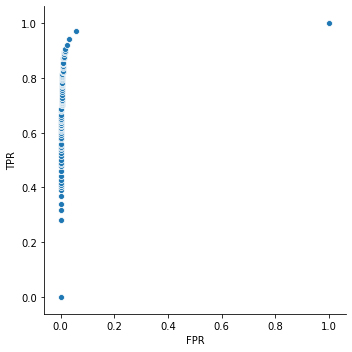

In [16]:
import seaborn as sns
sns.relplot(data=ROC_df_test,x='FPR',y='TPR')

In [17]:
from sklearn import metrics

auc_test = metrics.auc(ROC_df_test['FPR'],ROC_df_test['TPR'])

print('The test AUC is : \n', auc_test)

The test AUC is : 
 0.9817773226666667


In [18]:
index_row = ['Actually 0','Actually 1']
header_col = ['Predicted 0','Predicted 1']
conf_test = confusion_matrix(y_test,y_test_predicted)
test_conf = pd.DataFrame(conf_test,index=index_row,columns=header_col)
print('The confusion Matrix for test is : \n',test_conf)

The confusion Matrix for test is : 
             Predicted 0  Predicted 1
Actually 0        15576           49
Actually 1          112          263


In [19]:
y_train_predicted = np.zeros(60000)
prob_train_0 = np.zeros(60000)
data_train = loader.load_file("aps_train_for_weka_index_normal.csv")
data_train.class_is_first()
cls_train = Classifier(classname="weka.classifiers.trees.LMT")
cls_train.build_classifier(data_train)
for index,inst in enumerate(data_train):
    pred = cls_train.classify_instance(inst)
    dist = cls_train.distribution_for_instance(inst)
    y_train_predicted[index] = pred
    prob_train_0[index] = dist[0]
    
print(y_train_predicted)
print(prob_train_0)

[0. 0. 0. ... 0. 0. 0.]
[0.99046293 0.99843719 0.998931   ... 0.99945896 0.99949304 0.99928168]


In [20]:
frame_train = pd.read_csv('aps_train.csv',index_col=0)
y_train = frame_train['class']
train_mis = 0
for l in np.arange(0,60000):
    if y_train_predicted[l] != y_train[l]:
        train_mis = train_mis + 1

train_error = (train_mis/16000)*100
print('The train error obtained is : \n',train_error,'%')

The train error obtained is : 
 2.0 %


In [21]:
ROC_df_train = pd.DataFrame(index=np.arange(0,np.size(threshold_range)),columns=['TPR','FPR'])
i=0
for i in pointer:
    y_train_predicted_new = (prob_train_0 <= threshold_range[i]).astype(int)
    conf_train_new = confusion_matrix(y_train,y_train_predicted_new)
    TPR = conf_train_new[1][1]/(conf_train_new[1][1]+conf_train_new[1][0])
    FPR = conf_train_new[0][1]/(conf_train_new[0][1]+conf_train_new[0][0])
    ROC_df_train.iloc[i,0]=TPR
    ROC_df_train.iloc[i,1]=FPR    
    
print(ROC_df_train)

       TPR          FPR
0        0            0
1    0.339  1.69492e-05
2    0.375  1.69492e-05
3    0.405  3.38983e-05
4    0.418  5.08475e-05
..     ...          ...
96   0.938    0.0187458
97   0.944    0.0216441
98   0.951    0.0261525
99   0.966    0.0361525
100      1            1

[101 rows x 2 columns]


The train AUC is : 
 0.9803869491525423


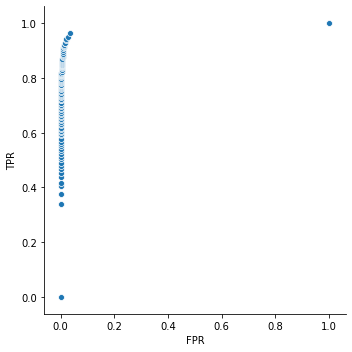

In [22]:
sns.relplot(data=ROC_df_train,x='FPR',y='TPR')
auc_train = metrics.auc(ROC_df_train['FPR'],ROC_df_train['TPR'])

print('The train AUC is : \n', auc_train)

In [23]:
conf_train = confusion_matrix(y_train,y_train_predicted)
train_conf = pd.DataFrame(conf_train,index=index_row,columns=header_col)
print('The confusion Matrix for train is : \n',train_conf)

The confusion Matrix for train is : 
             Predicted 0  Predicted 1
Actually 0        58922           78
Actually 1          242          758
